# Student Placement Prediction Using Naive Bayes

## Importing Libraries

In [3]:
#Suppress Warnings
options(warn = -1)
#Libraries
library(naivebayes)
library(e1071)
library(caTools)
library(ggplot2)
library(caret)
library(dplyr)
library(gdata)
library(ROSE)
library(stringr)
library(rBayesianOptimization)
library(psych)
library(smotefamily)
library(randomForest)
library(class)
library(superml)
library(corrplot)
library(klaR)
library(ROCR)
library(pROC)
library(MLmetrics)

naivebayes 0.9.7 loaded

Loading required package: lattice


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


gdata: Unable to locate valid perl interpreter
gdata: 
gdata: read.xls() will be unable to read Excel XLS and XLSX files
gdata: unless the 'perl=' argument is used to specify the location of a
gdata: valid perl intrpreter.
gdata: 
gdata: (To avoid display of this message in the future, please ensure
gdata: perl is installed and available on the executable search path.)

gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLX' (Excel 97-2004) files.



gdata: Unable to load perl libaries needed by read.xls()
gdata: to support 'XLSX' (Excel 2007+) files.



gdata: Run the function 'installXLSXsupport()'
gdata: to automatically download and install the perl
gdata: libaries needed to support Excel XLS and XLSX

# Reading Dataset

<li> Reading Dataset using R with command <b>read_excel("FileLocation")</b> for excel and <b>read.csv("FileLocation",header=TRUE)</b> for csv file 

In [4]:
df=read.csv("Placement.csv",header=TRUE)
head(df)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


In [5]:
tail(df)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<int>
210,M,62.0,Central,72,Central,Commerce,65.0,Comm&Mgmt,No,67,Mkt&Fin,56.49,Placed,216000
211,M,80.6,Others,82,Others,Commerce,77.6,Comm&Mgmt,No,91,Mkt&Fin,74.49,Placed,400000
212,M,58.0,Others,60,Others,Science,72.0,Sci&Tech,No,74,Mkt&Fin,53.62,Placed,275000
213,M,67.0,Others,67,Others,Commerce,73.0,Comm&Mgmt,Yes,59,Mkt&Fin,69.72,Placed,295000
214,F,74.0,Others,66,Others,Commerce,58.0,Comm&Mgmt,No,70,Mkt&HR,60.23,Placed,204000
215,M,62.0,Central,58,Others,Science,53.0,Comm&Mgmt,No,89,Mkt&HR,60.22,Not Placed,NA


In [6]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gender*,1,215,1.646512e+00,4.791683e-01,2,1.682081e+00,0.00000,1.00,2.00,1.00,-0.6086804,-1.637057582,3.267901e-02
ssc_p,2,215,6.730340e+01,1.082721e+01,67,6.744902e+01,10.67472,40.89,89.40,48.51,-0.1308043,-0.643327966,7.384093e-01
ssc_b*,3,215,1.460465e+00,4.995978e-01,1,1.450867e+00,0.00000,1.00,2.00,1.00,0.1575307,-1.984348797,3.407228e-02
hsc_p,4,215,6.633316e+01,1.089751e+01,65,6.620954e+01,8.89560,37.00,97.70,60.70,0.1613629,0.380901110,7.432040e-01
hsc_b*,5,215,1.609302e+00,4.890454e-01,2,1.635838e+00,0.00000,1.00,2.00,1.00,-0.4449237,-1.810398563,3.335262e-02
hsc_s*,6,215,2.372093e+00,5.809779e-01,2,2.404624e+00,0.00000,1.00,3.00,2.00,-0.2776921,-0.742417790,3.962236e-02
degree_p,7,215,6.637019e+01,7.358743e+00,66,6.620017e+01,7.56126,50.00,91.00,41.00,0.2415103,-0.004896303,5.018621e-01
degree_t*,8,215,1.600000e+00,8.902378e-01,1,1.502890e+00,0.00000,1.00,3.00,2.00,0.8654500,-1.180332507,6.071371e-02
workex*,9,215,1.344186e+00,4.762109e-01,1,1.306358e+00,0.00000,1.00,2.00,1.00,0.6513469,-1.583045406,3.247731e-02


In [7]:
str(df)

'data.frame':	215 obs. of  14 variables:
 $ gender        : chr  "M" "M" "M" "M" ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : chr  "Others" "Central" "Central" "Central" ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : chr  "Others" "Others" "Central" "Central" ...
 $ hsc_s         : chr  "Commerce" "Science" "Arts" "Science" ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : chr  "Sci&Tech" "Sci&Tech" "Comm&Mgmt" "Sci&Tech" ...
 $ workex        : chr  "No" "Yes" "No" "No" ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: chr  "Mkt&HR" "Mkt&Fin" "Mkt&Fin" "Mkt&HR" ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : chr  "Placed" "Placed" "Placed" "Not Placed" ...
 $ salary        : int  270000 200000 250000 NA 425000 NA NA 252000 231000 NA ...


### Identifying Dtypes

In [8]:
chrDT<-list()
intDT<-list()
for(i in seq(ncol(df)))
{
    if(typeof(df[,i])=="character")
    {
        chrDT<-append(chrDT,i,after=length(chrDT))
    }
    else{
       intDT<-append(intDT,i,after=length(intDT))
    }
}
cat("Character Datatype columns :\n")
for(i in names(df)[unlist(chrDT)])
cat('> ',i,"\n")

Character Datatype columns :
>  gender 
>  ssc_b 
>  hsc_b 
>  hsc_s 
>  degree_t 
>  workex 
>  specialisation 
>  status 


In [9]:
cat("\nInteger Datatype columns :\n")
for(i in names(df)[unlist(intDT)])
cat('> ',i,"\n")


Integer Datatype columns :
>  ssc_p 
>  hsc_p 
>  degree_p 
>  etest_p 
>  mba_p 
>  salary 


In [10]:
for(i in c(unlist(chrDT)))
    cat(names(df)[i],'{',summary(df[i]),'}',"\n\n")

gender { Length:215         Class :character   Mode  :character   } 

ssc_b { Length:215         Class :character   Mode  :character   } 

hsc_b { Length:215         Class :character   Mode  :character   } 

hsc_s { Length:215         Class :character   Mode  :character   } 

degree_t { Length:215         Class :character   Mode  :character   } 

workex { Length:215         Class :character   Mode  :character   } 

specialisation { Length:215         Class :character   Mode  :character   } 

status { Length:215         Class :character   Mode  :character   } 



In [11]:
for(i in c(unlist(intDT)))
    cat(names(df)[i],'{',summary(df[i]),'}',"\n\n")

ssc_p { Min.   :40.89   1st Qu.:60.60   Median :67.00   Mean   :67.30   3rd Qu.:75.70   Max.   :89.40   } 

hsc_p { Min.   :37.00   1st Qu.:60.90   Median :65.00   Mean   :66.33   3rd Qu.:73.00   Max.   :97.70   } 

degree_p { Min.   :50.00   1st Qu.:61.00   Median :66.00   Mean   :66.37   3rd Qu.:72.00   Max.   :91.00   } 

etest_p { Min.   :50.0   1st Qu.:60.0   Median :71.0   Mean   :72.1   3rd Qu.:83.5   Max.   :98.0   } 

mba_p { Min.   :51.21   1st Qu.:57.95   Median :62.00   Mean   :62.28   3rd Qu.:66.25   Max.   :77.89   } 

salary { Min.   :200000   1st Qu.:240000   Median :265000   Mean   :288655   3rd Qu.:300000   Max.   :940000   NA's   :67   } 



In [12]:
summary(df)

    gender              ssc_p          ssc_b               hsc_p      
 Length:215         Min.   :40.89   Length:215         Min.   :37.00  
 Class :character   1st Qu.:60.60   Class :character   1st Qu.:60.90  
 Mode  :character   Median :67.00   Mode  :character   Median :65.00  
                    Mean   :67.30                      Mean   :66.33  
                    3rd Qu.:75.70                      3rd Qu.:73.00  
                    Max.   :89.40                      Max.   :97.70  
                                                                      
    hsc_b              hsc_s              degree_p       degree_t        
 Length:215         Length:215         Min.   :50.00   Length:215        
 Class :character   Class :character   1st Qu.:61.00   Class :character  
 Mode  :character   Mode  :character   Median :66.00   Mode  :character  
                                       Mean   :66.37                     
                                       3rd Qu.:72.00          

# Data Preprocessing

## Making Categorical data

In [13]:
str(df)

'data.frame':	215 obs. of  14 variables:
 $ gender        : chr  "M" "M" "M" "M" ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : chr  "Others" "Central" "Central" "Central" ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : chr  "Others" "Others" "Central" "Central" ...
 $ hsc_s         : chr  "Commerce" "Science" "Arts" "Science" ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : chr  "Sci&Tech" "Sci&Tech" "Comm&Mgmt" "Sci&Tech" ...
 $ workex        : chr  "No" "Yes" "No" "No" ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: chr  "Mkt&HR" "Mkt&Fin" "Mkt&Fin" "Mkt&HR" ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : chr  "Placed" "Placed" "Placed" "Not Placed" ...
 $ salary        : int  270000 200000 250000 NA 425000 NA NA 252000 231000 NA ...


In [14]:
for(i in names(df))
{
  if(typeof(df[[i]])=="character")
  {
    df[[i]]=as.factor(df[[i]])
  }
}
str(df)

'data.frame':	215 obs. of  14 variables:
 $ gender        : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 1 2 2 2 ...
 $ ssc_p         : num  67 79.3 65 56 85.8 ...
 $ ssc_b         : Factor w/ 2 levels "Central","Others": 2 1 1 1 1 2 2 1 1 1 ...
 $ hsc_p         : num  91 78.3 68 52 73.6 ...
 $ hsc_b         : Factor w/ 2 levels "Central","Others": 2 2 1 1 1 2 2 1 1 1 ...
 $ hsc_s         : Factor w/ 3 levels "Arts","Commerce",..: 2 3 1 3 2 3 2 3 2 2 ...
 $ degree_p      : num  58 77.5 64 52 73.3 ...
 $ degree_t      : Factor w/ 3 levels "Comm&Mgmt","Others",..: 3 3 1 3 1 3 1 3 1 1 ...
 $ workex        : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ etest_p       : num  55 86.5 75 66 96.8 ...
 $ specialisation: Factor w/ 2 levels "Mkt&Fin","Mkt&HR": 2 1 1 2 1 1 1 1 1 1 ...
 $ mba_p         : num  58.8 66.3 57.8 59.4 55.5 ...
 $ status        : Factor w/ 2 levels "Not Placed","Placed": 2 2 2 1 2 1 1 2 2 1 ...
 $ salary        : int  270000 200000 250000 NA 425000 NA NA 252000 231

### Attribute Selection

<li> Deleting Salary Attribute because salary attribute is not contributing anything to model

In [15]:
df=df[,-ncol(df)] #deleting salary attribute  
head(df)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed


In [16]:
summary(df)

 gender      ssc_p           ssc_b         hsc_p           hsc_b    
 F: 76   Min.   :40.89   Central:116   Min.   :37.00   Central: 84  
 M:139   1st Qu.:60.60   Others : 99   1st Qu.:60.90   Others :131  
         Median :67.00                 Median :65.00                
         Mean   :67.30                 Mean   :66.33                
         3rd Qu.:75.70                 3rd Qu.:73.00                
         Max.   :89.40                 Max.   :97.70                
      hsc_s        degree_p          degree_t   workex       etest_p    
 Arts    : 11   Min.   :50.00   Comm&Mgmt:145   No :141   Min.   :50.0  
 Commerce:113   1st Qu.:61.00   Others   : 11   Yes: 74   1st Qu.:60.0  
 Science : 91   Median :66.00   Sci&Tech : 59             Median :71.0  
                Mean   :66.37                             Mean   :72.1  
                3rd Qu.:72.00                             3rd Qu.:83.5  
                Max.   :91.00                             Max.   :98.0  
 speci

### Size and Checking for NULL values

In [17]:
cat("Size of DataFrame :",dim(df)[1],'x',dim(df)[2],"\n")
cat("No. of NULL values in Dataset : ",sum(is.na(df)))

Size of DataFrame : 215 x 13 
No. of NULL values in Dataset :  0

In [18]:
head(data.frame(df$status))

,df.status
,<fct>
1,Placed
2,Placed
3,Placed
4,Not Placed
5,Placed
6,Not Placed


### Correlation between the features

In [19]:
chrDT<-list()
intDT<-list()
for(i in seq(ncol(df)))
{
    if(typeof(df[,i])=="integer")
    {
        chrDT<-append(chrDT,i,after=length(chrDT))
    }
    else{
       intDT<-append(intDT,i,after=length(intDT))
    }
}

corel<-cor(df[,unlist(intDT)], method = "pearson", use = "complete.obs")
corel

,ssc_p,hsc_p,degree_p,etest_p,mba_p
ssc_p,1.0000000,0.5114721,0.5384040,0.2619927,0.3884776
hsc_p,0.5114721,1.0000000,0.4342058,0.2451129,0.3548226
degree_p,0.5384040,0.4342058,1.0000000,0.2244702,0.4023638
etest_p,0.2619927,0.2451129,0.2244702,1.0000000,0.2180547
mba_p,0.3884776,0.3548226,0.4023638,0.2180547,1.0000000


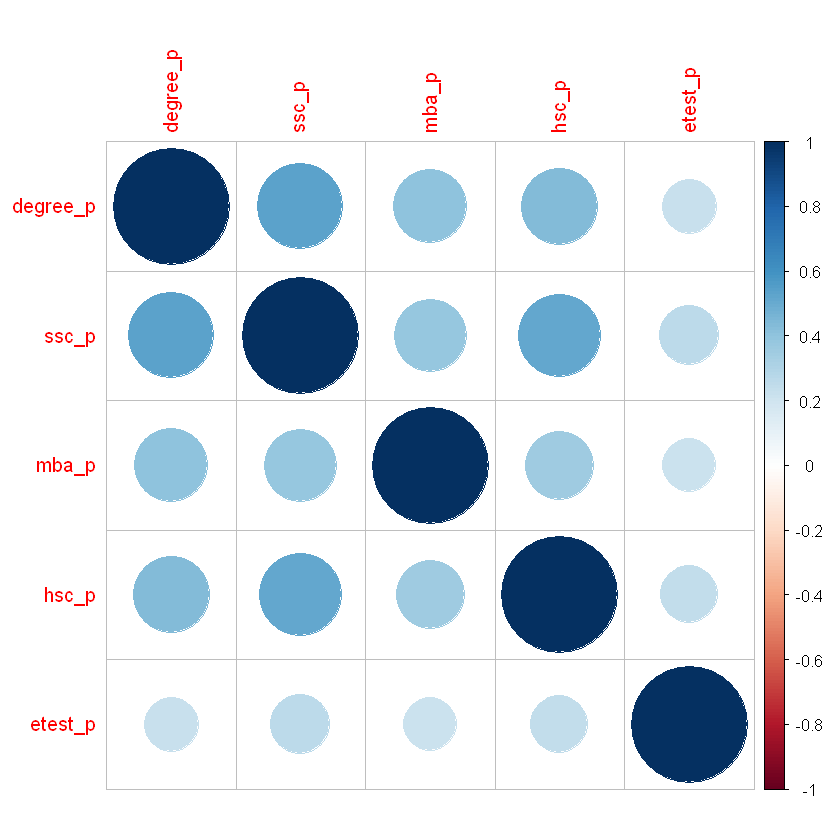

In [20]:
corrplot(corel, order = 'AOE')

<li> All attributes have positive correlation but not in huge margin. So, we can conclude that these are independent variables

### Description of Placed data points

In [21]:
describe(df[df$status=='Placed',][,unlist(intDT)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ssc_p,1,148,71.72149,8.715445,72.500,71.78592,10.474569,49.00,89.40,40.40,-0.06000429,-0.7654162,0.7164052
hsc_p,2,148,69.92655,9.329268,68.000,69.03400,8.895600,50.83,97.70,46.87,0.75155303,0.1558520,0.7668611
degree_p,3,148,68.74054,6.518087,68.000,68.57975,5.930400,56.00,91.00,35.00,0.39791948,0.2786817,0.5357835
etest_p,4,148,73.23804,13.729333,72.000,72.91958,17.791200,50.00,98.00,48.00,0.15045695,-1.2453877,1.1285442
mba_p,5,148,62.57939,5.884583,62.245,62.35817,6.693939,52.38,77.89,25.51,0.32755739,-0.6443355,0.4837097


### Description of Not Placed data points

In [22]:
describe(df[df$status=='Not Placed',][,unlist(intDT)])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ssc_p,1,67,57.54403,8.394246,56.28,57.39400,8.480472,40.89,77.80,36.91,0.19840265,-0.4863799,1.0255204
hsc_p,2,67,58.39552,9.914090,60.33,58.42855,9.888942,37.00,82.00,45.00,-0.03406898,-0.5122989,1.2111989
degree_p,3,67,61.13418,6.365825,61.00,60.72345,5.930400,50.00,79.00,29.00,0.55718333,0.2169192,0.7777094
etest_p,4,67,69.58791,11.930687,67.00,68.83636,11.860800,50.00,97.00,47.00,0.52317065,-0.6678661,1.4575653
mba_p,5,67,61.61284,5.705689,60.69,61.47764,6.004530,51.21,75.71,24.50,0.24287438,-0.3347438,0.6970608


## Data Analysis and Visualization

### Prediction Class distribution

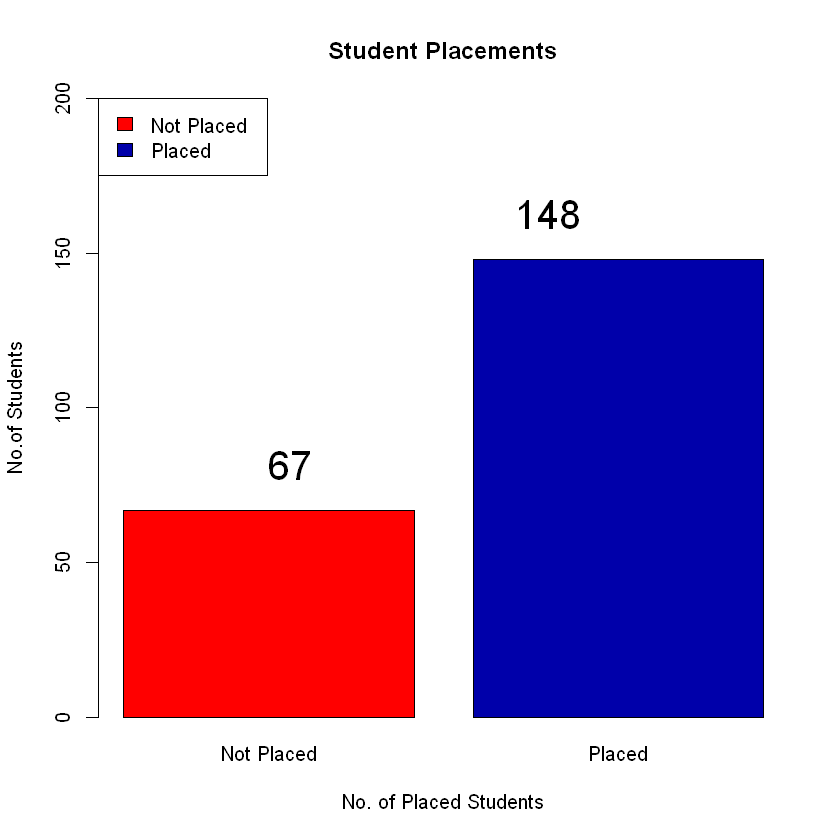

In [23]:
barplot(table(df$status), main = "Student Placements",
        xlab="No. of Placed Students",ylab="No.of Students",col=c('red','#0000AA'),ylim=c(0,200))
legend("topleft",c("Not Placed","Placed"),fill = c('red','#0000AA'))
val<-c(nrow(df[df$status=="Not Placed",]),nrow(df[df$status=="Placed",]))
text(val+10,labels =val,adj=c(2,0),cex=2)

<li> from above graph we can conclude that there is imbalance in prediction class attribute which may affect in model accuracy

In [24]:
cat("Prediction Class Datatype : ",class(df$status))

Prediction Class Datatype :  factor

### Gender data distribution

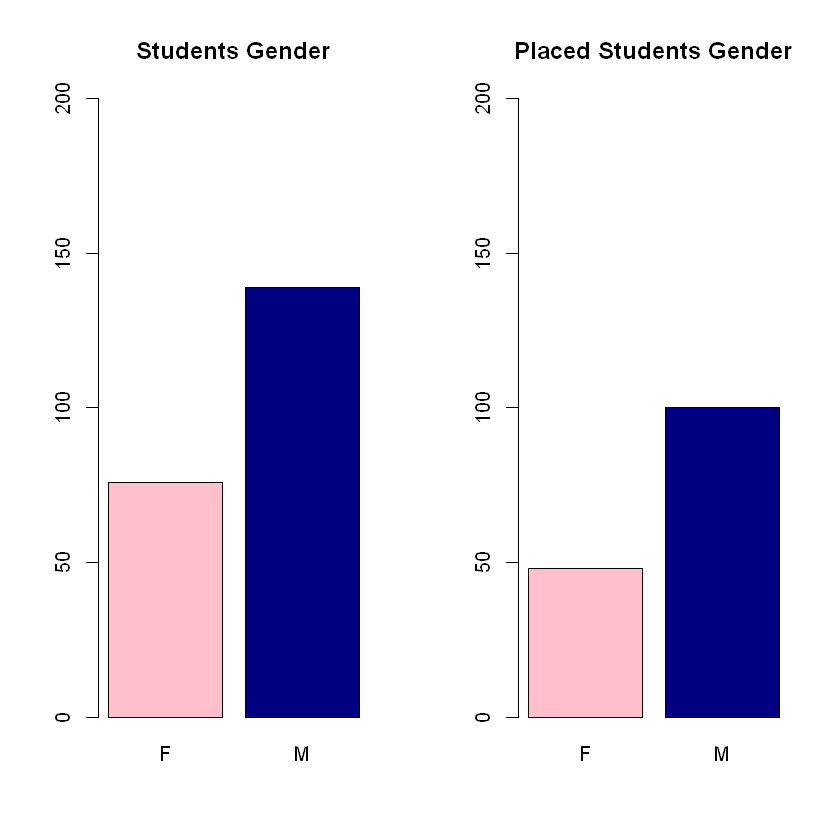

In [25]:
par(mfrow=c(1,2))
barplot(table(df$gender),main="Students Gender", col=c('pink','navy'),ylim=c(0,200))
barplot(table(df$gender[df$status=='Placed']),main="Placed Students Gender", col=c('pink','navy'),ylim=c(0,200))

<li> There is very little or none difference in placement recruitment based on gender

### SSC Board data distribution

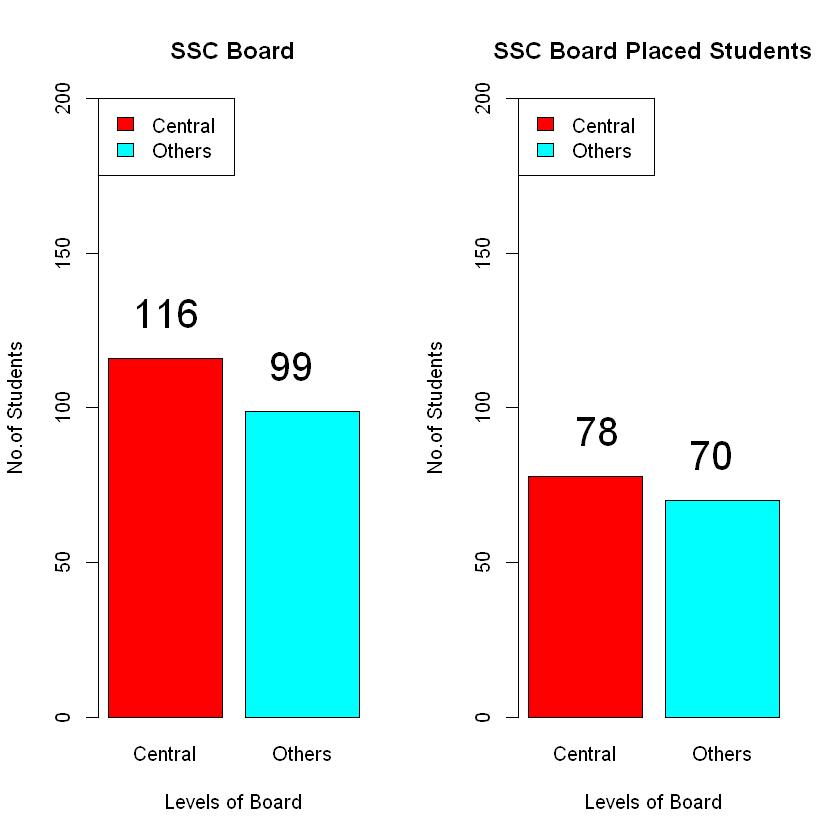

In [26]:
par(mfrow=c(1,2))

barplot(table(df$ssc_b), main = "SSC Board",
        xlab="Levels of Board", ylab="No.of Students",col =rainbow(2),ylim=c(0,200))
legend("topleft",c("Central","Others"),fill = rainbow(2))
val<-c(nrow(df[df$ssc_b=="Central",]),nrow(df[df$ssc_b=="Others",]))
text(val+10,labels =val,adj=c(1,0),cex=2)

barplot(table(df$ssc_b[df$status =='Placed']), main = "SSC Board Placed Students",
        xlab="Levels of Board", ylab="No.of Students",col =rainbow(2),ylim=c(0,200))
legend("topleft",c("Central","Others"),fill = rainbow(2))
val<-c(
  nrow(df[df$status =='Placed',][as.data.frame(df$ssc_b[df$status =='Placed'])=='Central',]),
  nrow(df[df$status =='Placed',][as.data.frame(df$ssc_b[df$status =='Placed'])=='Others',])
)
text(val+10,labels =val,adj=c(1,0),cex=2)



<li> In student placement board secondary education don't play major role

### HSC Board data distribution

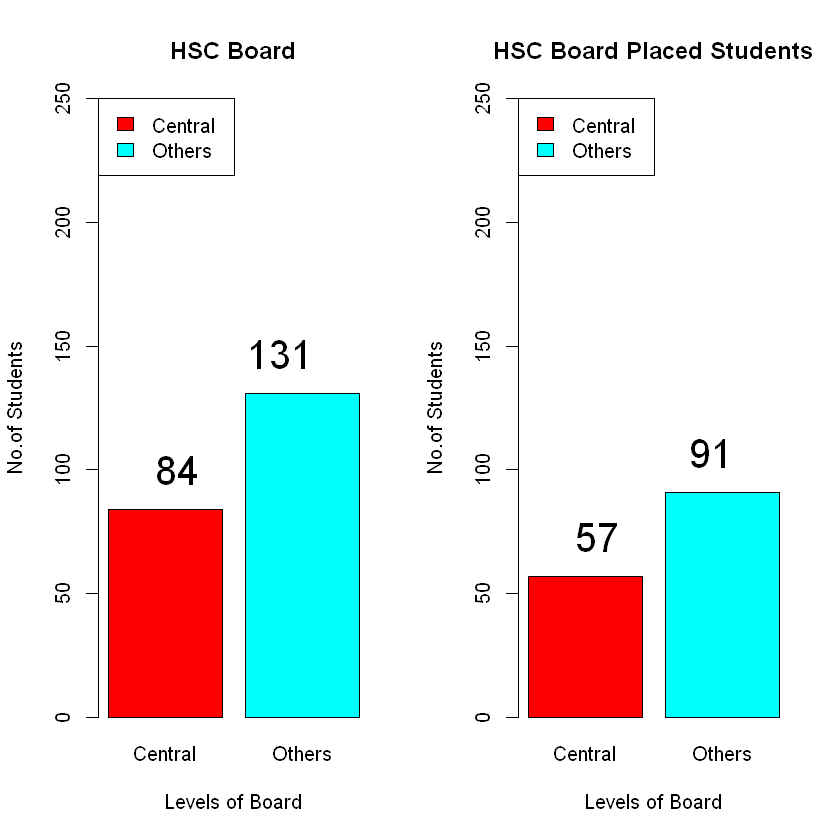

In [27]:
par(mfrow=c(1,2))

x<-barplot(table(df$hsc_b), main = "HSC Board",
        xlab="Levels of Board", ylab="No.of Students",col =rainbow(2),ylim=c(0,250))
legend("topleft",c("Central","Others"),fill = rainbow(2))
val<-c(nrow(df[df$hsc_b=="Central",]),nrow(df[df$hsc_b=="Others",]))
text(val+10,labels =val,adj=c(1,0),cex=2)

barplot(table(df$hsc_b[df$status =='Placed']), main = "HSC Board Placed Students",
        xlab="Levels of Board", ylab="No.of Students",col =rainbow(2),ylim=c(0,250))
legend("topleft",c("Central","Others"),fill = rainbow(2))
val<-c(
  nrow(df[df$status =='Placed',][as.data.frame(df$hsc_b[df$status =='Placed'])=='Central',]),
  nrow(df[df$status =='Placed',][as.data.frame(df$hsc_b[df$status =='Placed'])=='Others',])
)
text(val+10,labels =val,adj=c(1,0),cex=2)


<li> when we compare ssc board and hsc board there is huge switch from central to others

### SSC & HSC Board student pass percentage 

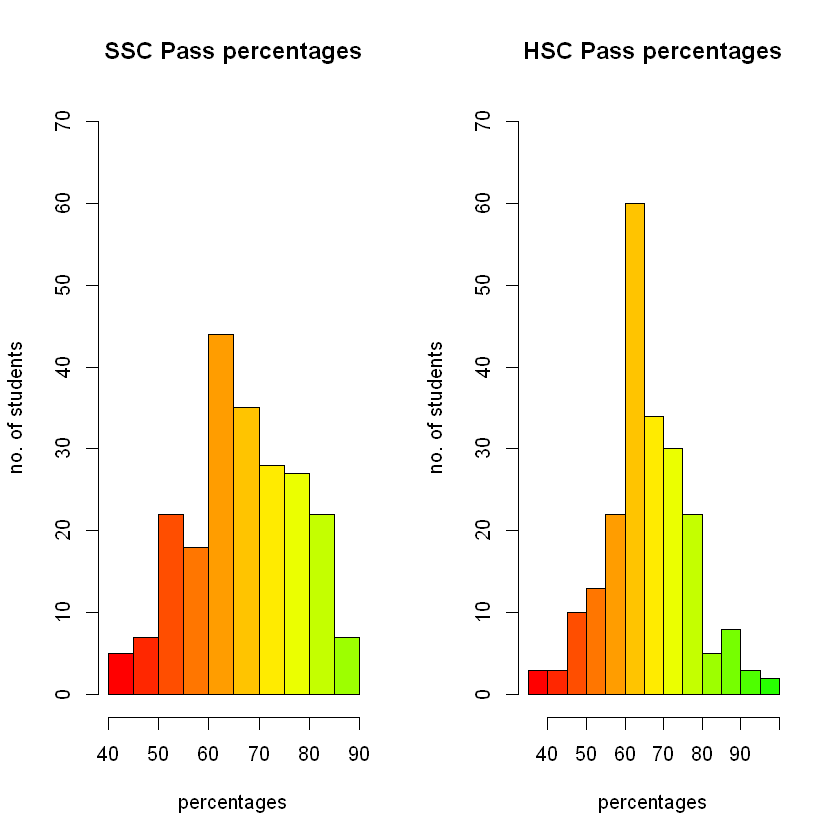

In [28]:
par(mfrow=c(1,2))
# par( mai=c(0.2,0.2,0.2,0.2))
# par(fig=c(0,0.5,0.5,1))
hist(df$ssc_p,col=rainbow(39),new=TRUE,xlab='percentages',ylab='no. of students',main='SSC Pass percentages',ylim=c(0,70))
#par(fig=c(0.5,1,0.5,1), new=TRUE)
hist(df$hsc_p,col=rainbow(39),new=TRUE,xlab='percentages',ylab='no. of students',main='HSC Pass percentages',ylim=c(0,70))

### Branch data distribution 

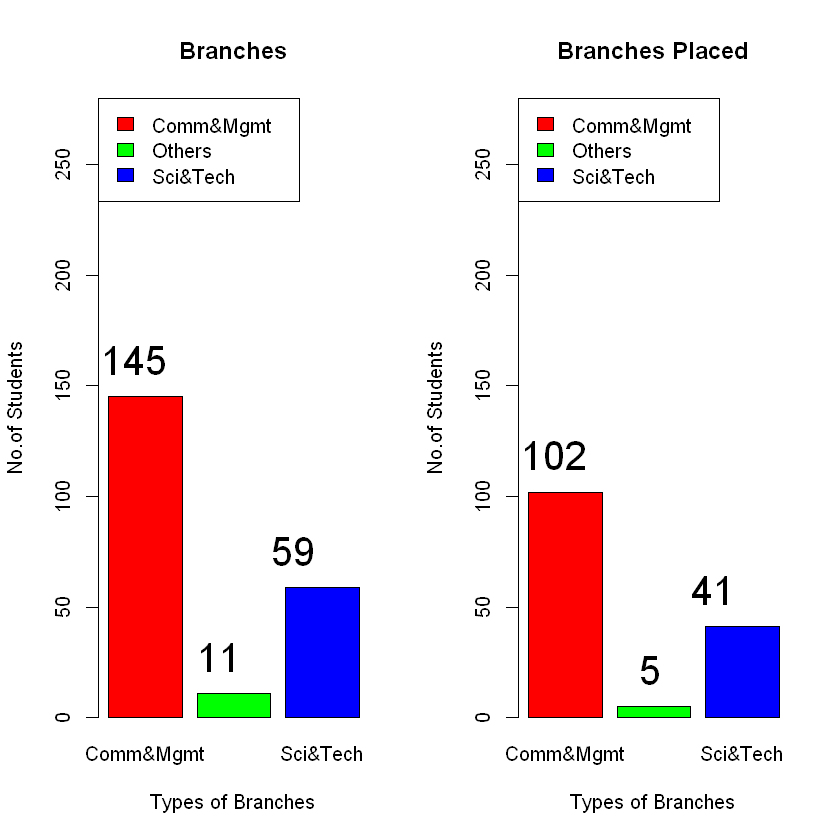

In [29]:
par(mfrow=c(1,2))#, mar=c(4,4,4,1), oma=c(0.5,0.5,0.5,0))

barplot(table(df$degree_t), main = "Branches",
     xlab="Types of Branches", ylab="No.of Students",col =rainbow(3),ylim=c(0,280))
legend("topleft",c("Comm&Mgmt","Others","Sci&Tech"),fill = rainbow(3))
val<-c(nrow(df[df$degree_t=="Comm&Mgmt",]),nrow(df[df$degree_t=="Others",]),nrow(df[df$degree_t=="Sci&Tech",]))
text(val+10,labels =val,adj=c(1,0),cex=2)

barplot(table(df$degree_t[df$status=='Placed']), main = "Branches Placed",
     xlab="Types of Branches", ylab="No.of Students",col =rainbow(3),ylim=c(0,280))
legend("topleft",c("Comm&Mgmt","Others","Sci&Tech"),fill = rainbow(3))
val<-c(nrow(df[df$status=='Placed',][as.data.frame(df$degree_t[df$status =='Placed'])=="Comm&Mgmt",]),
       nrow(df[df$status=='Placed',][as.data.frame(df$degree_t[df$status =='Placed'])=="Others",]),
       nrow(df[df$status=='Placed',][as.data.frame(df$degree_t[df$status =='Placed'])=="Sci&Tech",])
      )
text(val+10,labels =val,adj=c(1,0),cex=2)


### Work Experience data distribution 

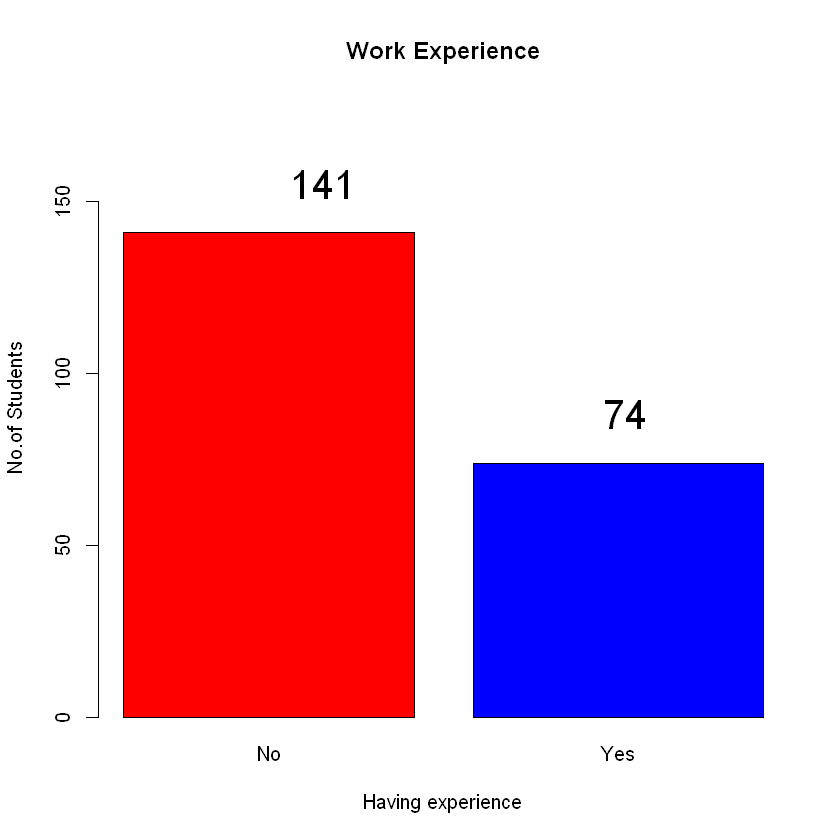

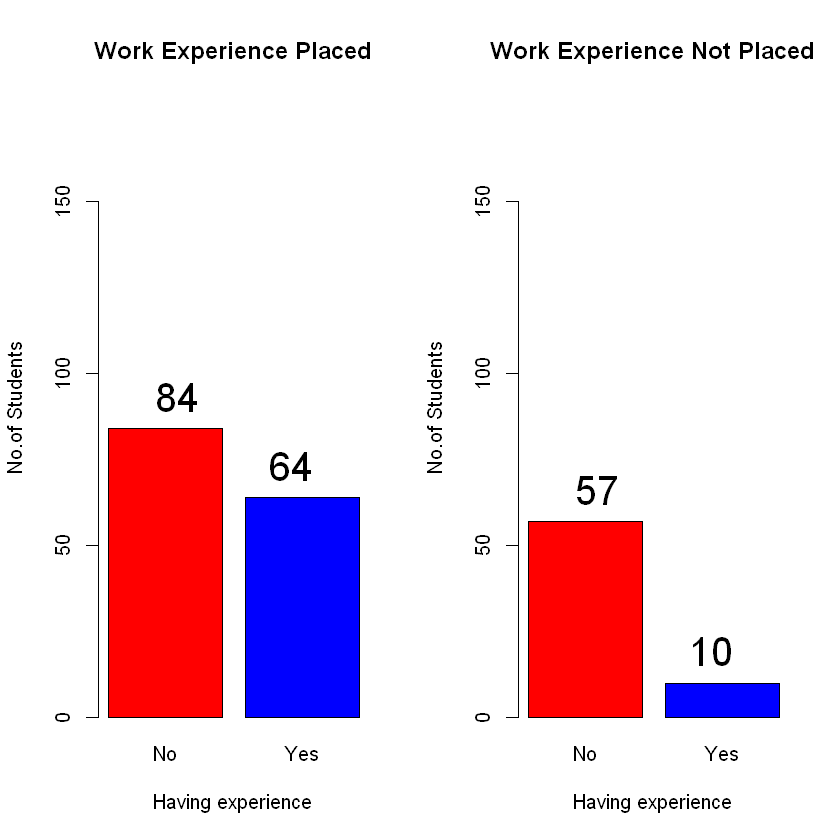

In [30]:
barplot(table(df$workex),main='Work Experience',col=c('red','blue'),xlab="Having experience", ylab="No.of Students",ylim=c(0,180))
val<-c(nrow(df[df$workex=="No",]),nrow(df[df$workex=="Yes",]))
text(val+10,labels =val,adj=c(1,0),cex=2)
par(mfrow=c(1,2))
barplot(table(df$workex[df$status=='Placed']),main='Work Experience Placed',col=c('red','blue'),xlab="Having experience", ylab="No.of Students",ylim=c(0,180))
val<-c(length(df$workex[df$status=='Placed'][df$workex[df$status=='Placed']=='No']),length(df$workex[df$status=='Placed'][df$workex[df$status=='Placed']=='Yes']))
text(val+5,labels =val,adj=c(1,0),cex=2)
barplot(table(df$workex[df$status=='Not Placed']),main='Work Experience Not Placed',col=c('red','blue'),xlab="Having experience", ylab="No.of Students",ylim=c(0,180))
val<-c(length(df$workex[df$status=='Not Placed'][df$workex[df$status=='Not Placed']=='No']),length(df$workex[df$status=='Not Placed'][df$workex[df$status=='Not Placed']=='Yes']))
text(val+5,labels =val,adj=c(1,0),cex=2)

<li> ratio students having work experience and getting placed is more than the ratio students not having work experience and getting placed.

### Employee Readiness Test scores 

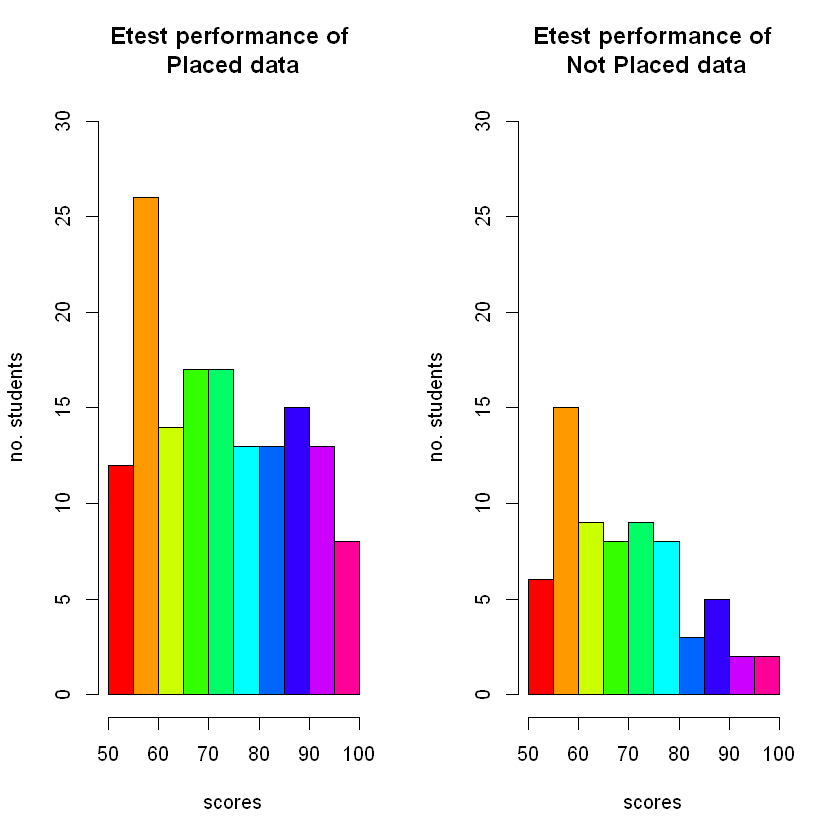

In [31]:
par(mfrow=c(1,2))

hist(df$etest_p[df$status=='Placed'],col=rainbow(10),new=TRUE,ylim=c(0,30),main='Etest performance of \nPlaced data',xlab='scores',ylab='no. students')
hist(df$etest_p[df$status=='Not Placed'],col=rainbow(10),new=TRUE,ylim=c(0,30),main='Etest performance of\n Not Placed data',xlab='scores',ylab='no. students')


<h4>Data interpretation </h4>
<ul>
<li> By all the graphs we can conclude that all attributes are independent and all together combined to give meaningful results
<li> for this dataset naive bayes is perfect suitable but due to imbalance there might be hickups in testing performance.
</ul>

# Naive Bayes Classifier Training and Testing

Naive Bayes is a classification and prediction algorithm based on Bayes Theorem. Bayes Theorem


<img style="align:left;width:250px;height:70px;" src="posteriorprob.png">
<ul>
<li>P(A|B)  -  Probability of occurrence of event A given the event B is true   ie. Posterior Probability
<li>P(A)  - Probabilities of the occurrence of event A ie. Class prior Probability
<li>P(B) - Probabilities of the occurrence of event B ie. Evidence 
<li>P(B|A)  - Probability of the occurrence of event B given the event A is true ie.Likelihood
   </ul>
  
	Naive Bayes algorithm based on Bayes’ theorem with the assumption of independence between every pair of features. 

## Training Naive Bayes model

In [32]:
#set.seed(237)  
ind<-sample(2,nrow(df),replace=TRUE,prob=c(0.8,0.2))
train_cl<-df[ind==1,]
head(train_cl)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed
7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed
8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed


In [33]:
test_cl<-df[ind==2,]
head(test_cl)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>
4,M,56,Central,52.0,Central,Science,52.00,Sci&Tech,No,66,Mkt&HR,59.43,Not Placed
6,M,55,Others,49.8,Others,Science,67.25,Sci&Tech,Yes,55,Mkt&Fin,51.58,Not Placed
10,M,58,Central,70.0,Central,Commerce,61.00,Comm&Mgmt,No,54,Mkt&Fin,52.21,Not Placed
11,M,58,Central,61.0,Central,Commerce,60.00,Comm&Mgmt,Yes,62,Mkt&HR,60.85,Placed
15,M,62,Central,47.0,Central,Commerce,50.00,Comm&Mgmt,No,76,Mkt&HR,54.96,Not Placed
16,F,65,Central,75.0,Central,Commerce,69.00,Comm&Mgmt,Yes,72,Mkt&Fin,64.66,Placed


In [34]:
grid <- data.frame(fL=c(0,0.5,1.0), usekernel = TRUE, adjust=c(0,0.5,1.0))
classifier_cl <- naive_bayes(status ~ ., data = train_cl, tuneGrid=grid)
classifier_cl[4]

$tables

--------------------------------------------------------------------------------- 
 ::: gender (Bernoulli) 
--------------------------------------------------------------------------------- 
      
gender Not Placed    Placed
     F  0.4716981 0.3277311
     M  0.5283019 0.6722689

--------------------------------------------------------------------------------- 
 ::: ssc_p (Gaussian) 
--------------------------------------------------------------------------------- 
      
ssc_p  Not Placed    Placed
  mean  58.059434 71.658992
  sd     8.917005  8.579787

--------------------------------------------------------------------------------- 
 ::: ssc_b (Bernoulli) 
--------------------------------------------------------------------------------- 
         
ssc_b     Not Placed    Placed
  Central  0.5283019 0.5798319
  Others   0.4716981 0.4201681

--------------------------------------------------------------------------------- 
 ::: hsc_p (Gaussian) 
---------------------------

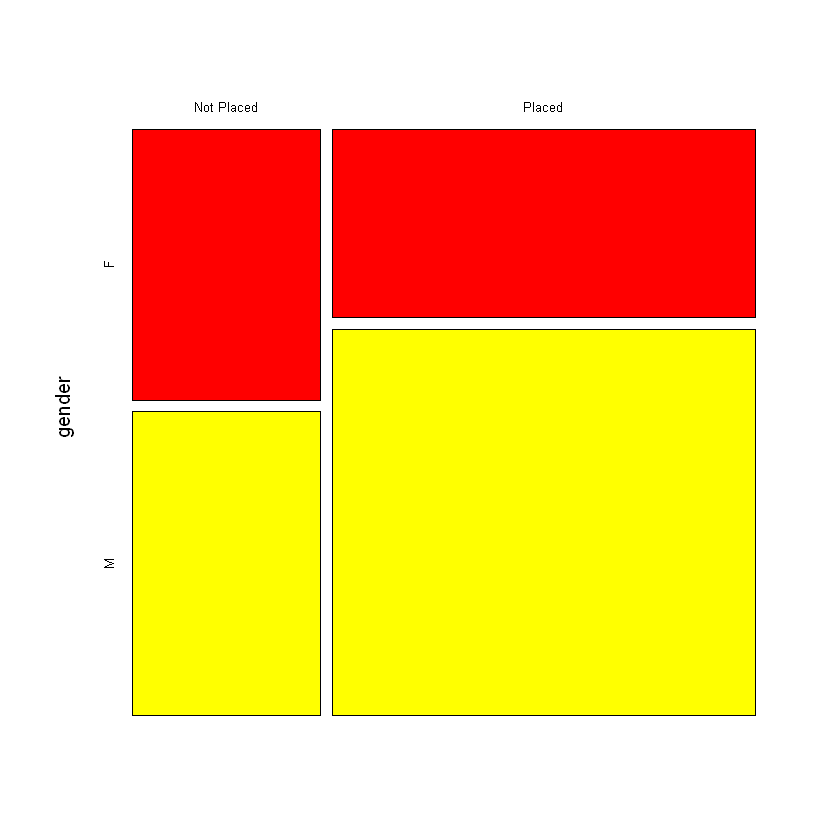

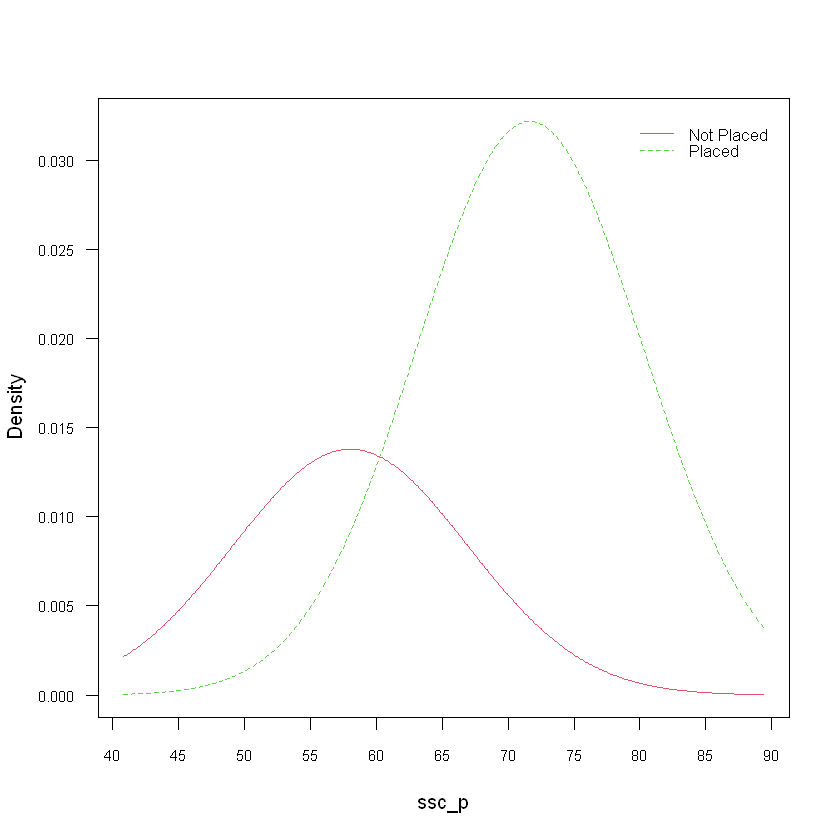

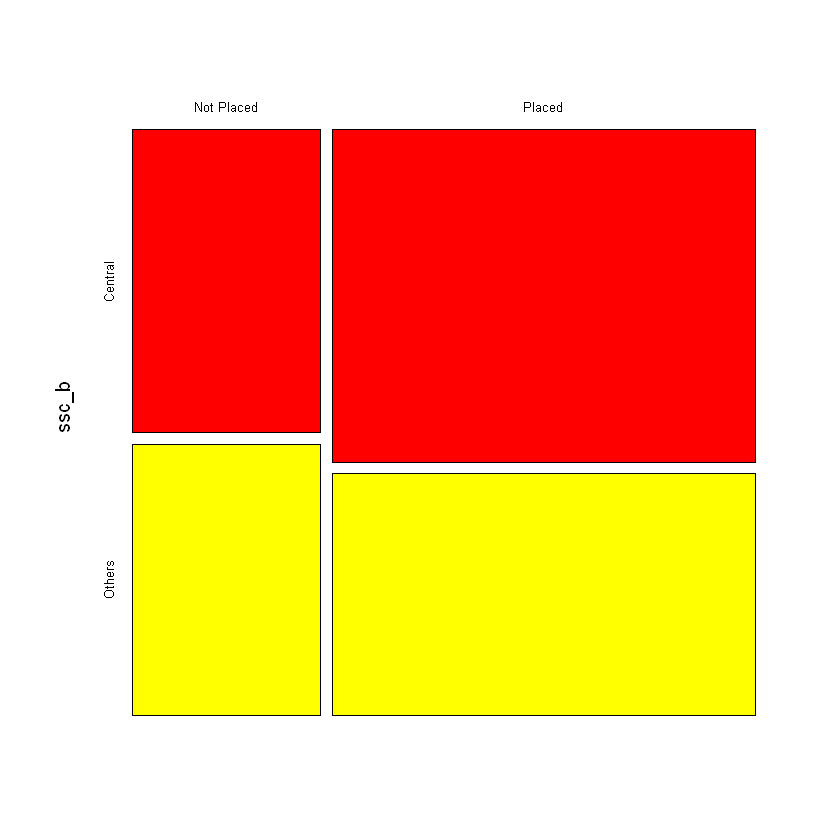

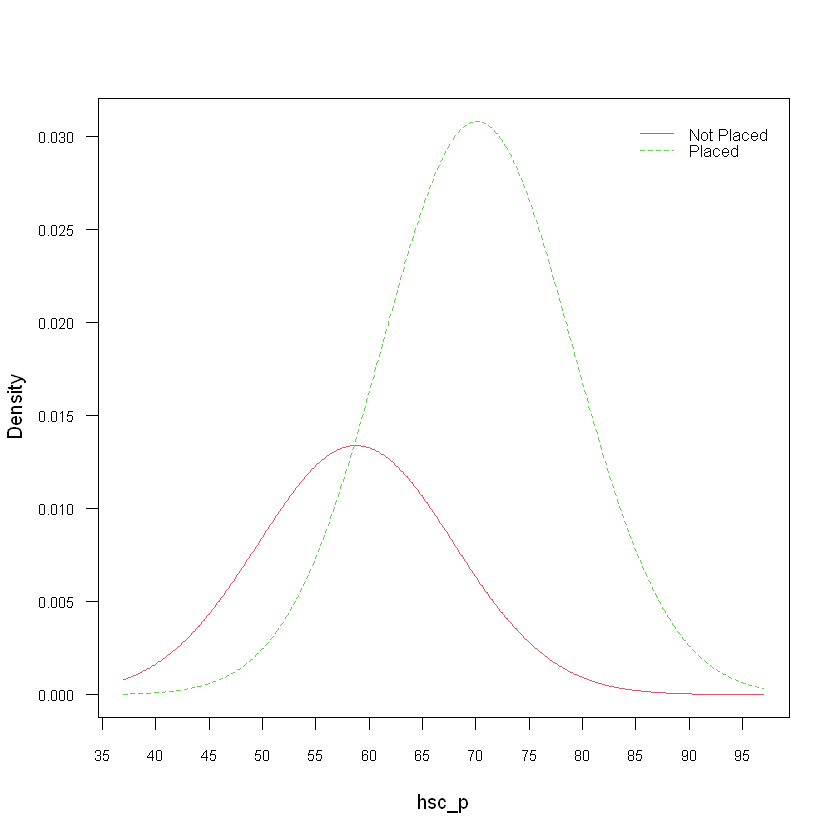

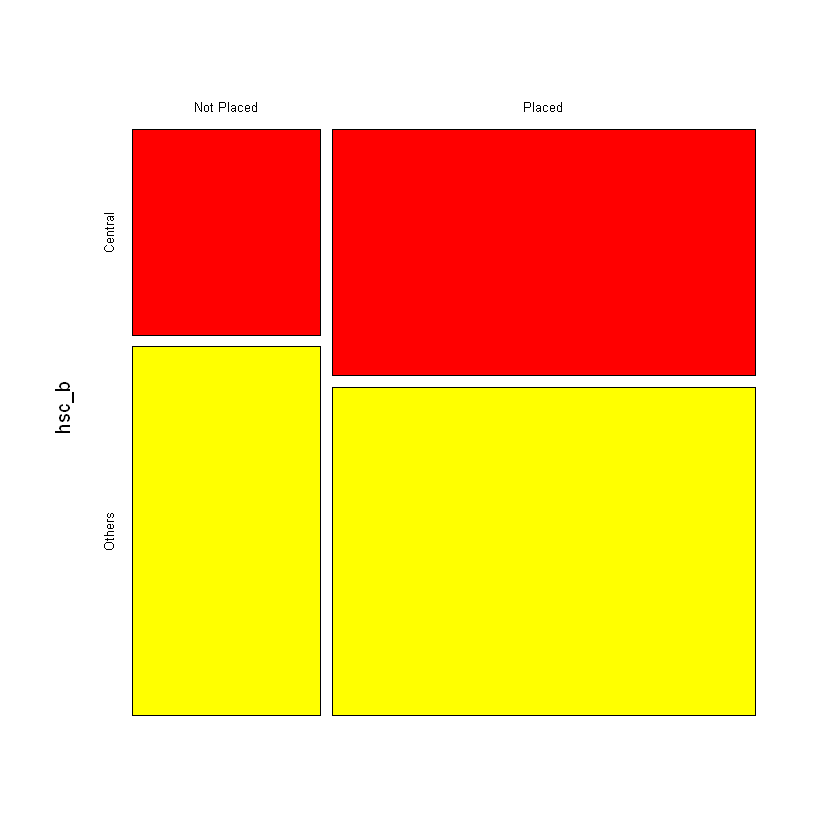

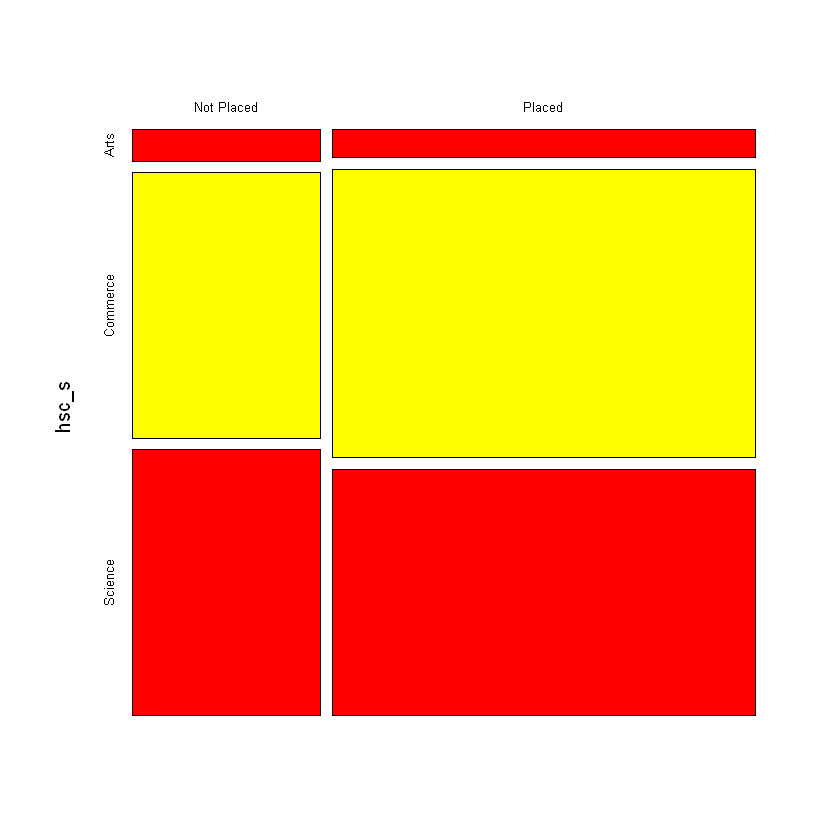

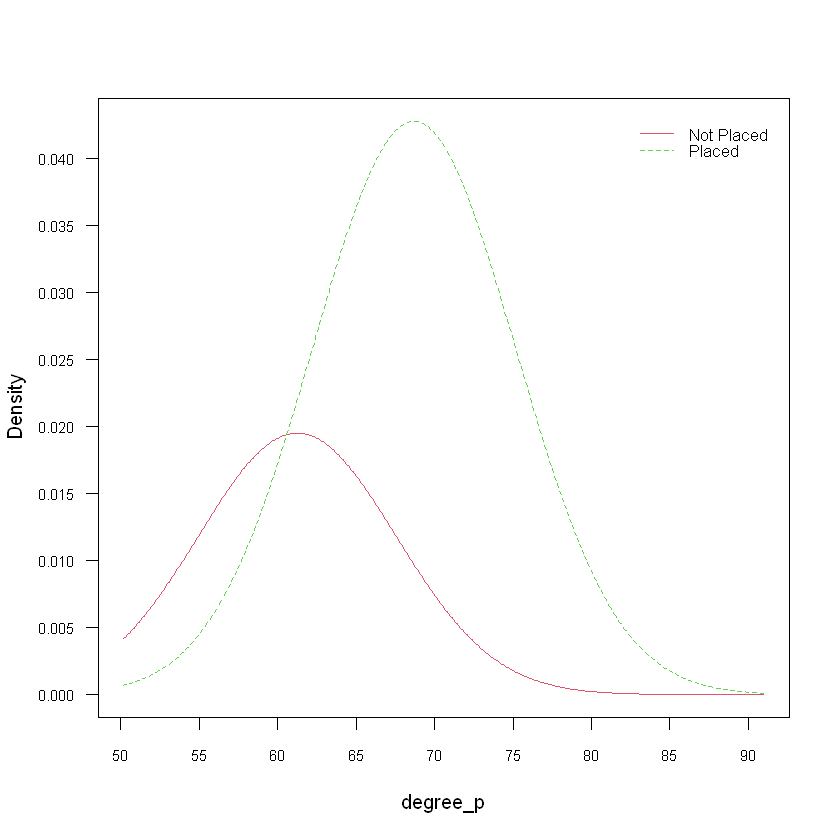

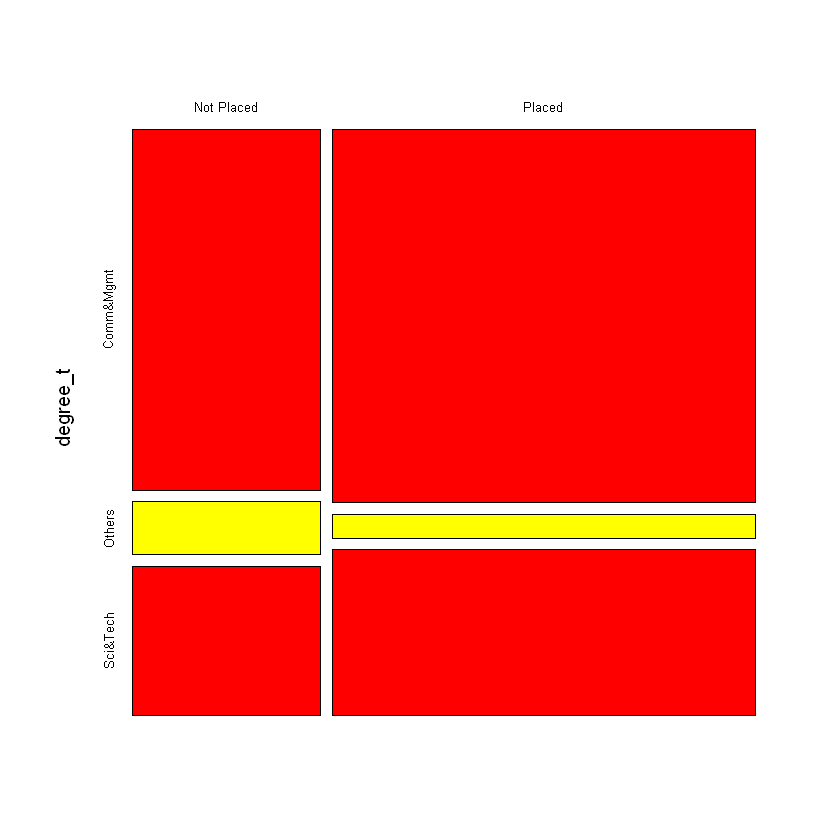

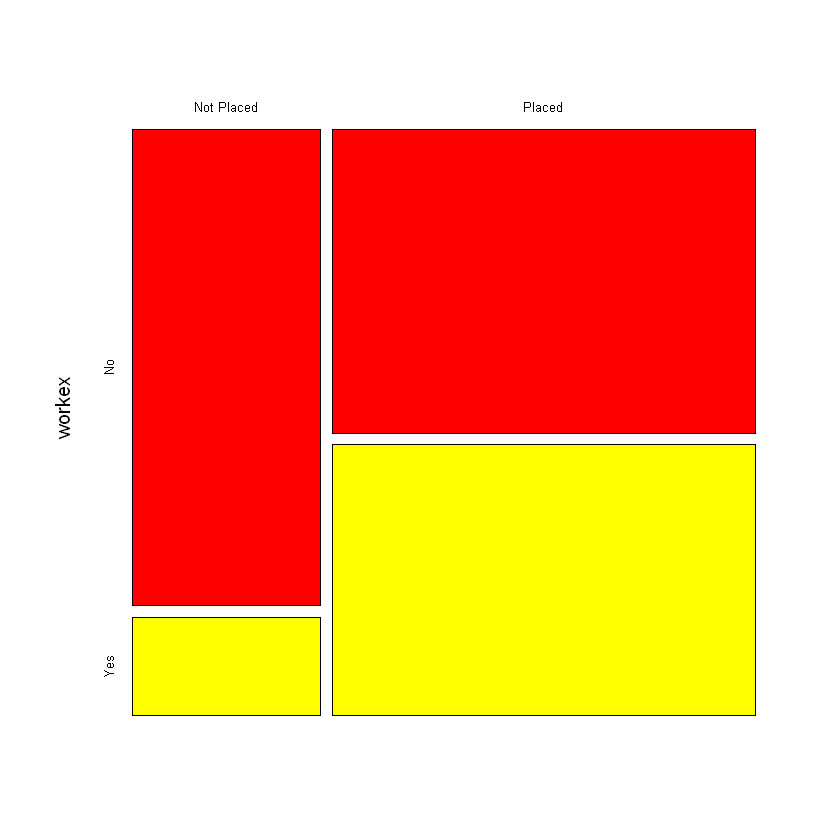

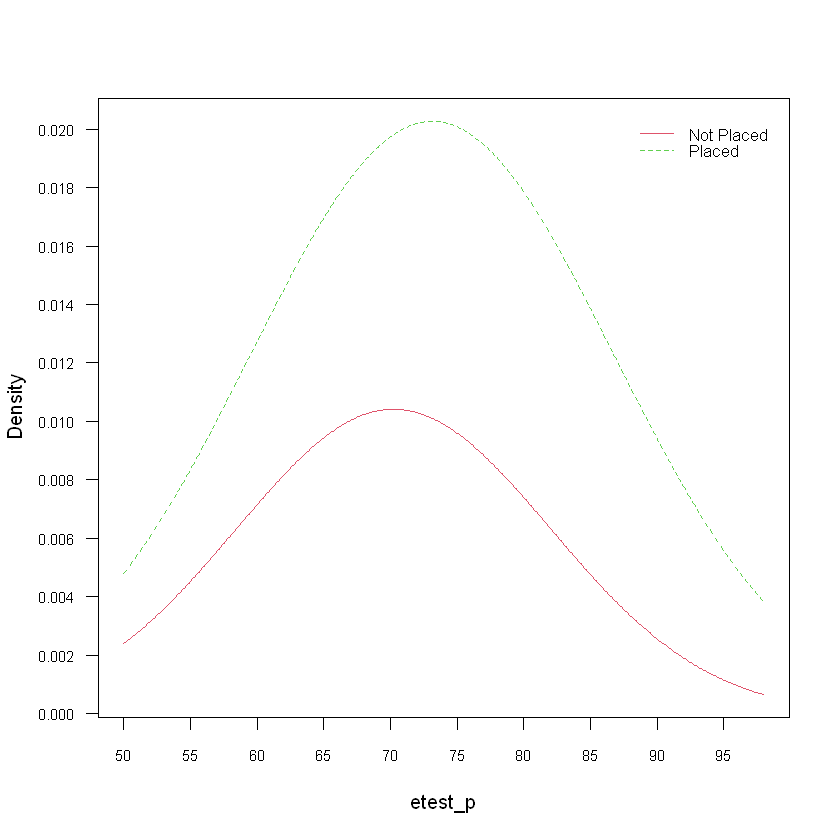

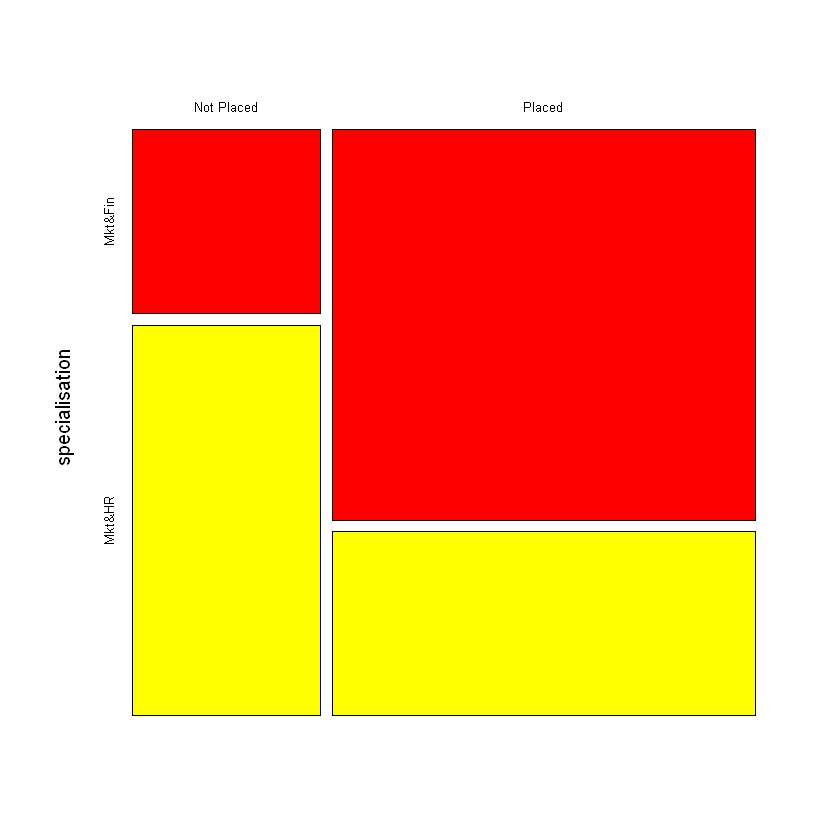

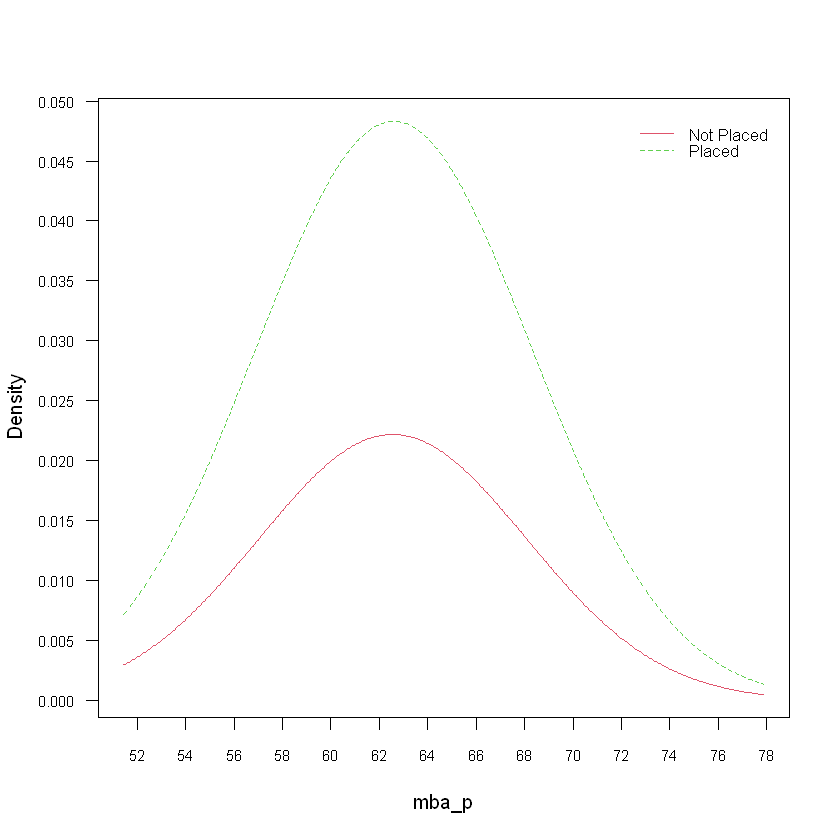

In [35]:
plot(classifier_cl)

## Model Validation

In [36]:
y_pred_vd <- predict(classifier_cl, newdata = train_cl,interval = 'confidence')
y_pred_vd

[1] Placed     Placed     Placed     Placed     Not Placed Placed    
  [7] Placed     Placed     Not Placed Placed     Placed     Not Placed
 [13] Not Placed Placed     Not Placed Placed     Placed     Not Placed
 [19] Placed     Not Placed Placed     Placed     Not Placed Placed    
 [25] Placed     Not Placed Placed     Not Placed Placed     Placed    
 [31] Placed     Placed     Placed     Placed     Placed     Placed    
 [37] Not Placed Placed     Not Placed Not Placed Not Placed Placed    
 [43] Placed     Placed     Placed     Placed     Placed     Placed    
 [49] Not Placed Placed     Not Placed Placed     Placed     Placed    
 [55] Placed     Placed     Placed     Placed     Placed     Placed    
 [61] Placed     Placed     Placed     Placed     Placed     Placed    
 [67] Not Placed Placed     Placed     Placed     Not Placed Placed    
 [73] Placed     Placed     Placed     Not Placed Placed     Placed    
 [79] Placed     Placed     Not Placed Not Placed Placed     Not Placed
 [85] Placed     Not Placed Placed     Placed     Placed     Placed    
 [91] Placed     Placed     Placed     Not Placed Placed     Placed    
 [97] Placed     Placed     Placed     Placed     Placed     Placed    
[103] Placed     Placed     Placed     Not Placed Placed     Placed    
[109] Placed     Placed     Not Placed Placed     Placed     Not Placed
[115] Placed     Placed     Not Placed Placed     Placed     Placed    
[121] Not Placed Not Placed Not Placed Placed     Placed     Placed    
[127] Placed     Placed     Placed     Not Placed Placed     Not Placed
[133] Not Placed Not Placed Placed     Not Placed Placed     Not Placed
[139] Not Placed Placed     Not Placed Placed     Placed     Not Placed
[145] Not Placed Not Placed Placed     Not Placed Placed     Not Placed
[151] Placed     Placed     Placed     Not Placed Not Placed Placed    
[157] Placed     Placed     Placed     Not Placed Not Placed Placed    
[163] Placed     Not Placed Not Placed Placed     Not Placed Placed    
[169] Placed     Placed     Not Placed Not Placed
Levels: Not Placed Placed

In [37]:
accuracy<-function(y_act,y_preds)
{
    cm <- table(y_act,y_preds)
    return(sum(diag(cm))/length(y_act)*100)
}
recall<-function(y_act,y_preds)
{
    cm <- table(y_act,y_preds)
    return((cm[2,2]/(cm[2,2]+cm[1,2]))*100)
}
precision<-function(y_act,y_preds)
{
    cm <- table(y_act,y_preds)
    return((cm[2,2]/(cm[2,2]+cm[2,1]))*100)
}
f1_score<-function(y_act,y_preds)
{
    return((2*precision(y_act,y_preds)*recall(y_act,y_preds))/(precision(y_act,y_preds)+recall(y_act,y_preds)))
}

In [38]:
cm <- table(train_cl$status, y_pred_vd)
cm

            y_pred_vd
             Not Placed Placed
  Not Placed         39     14
  Placed             14    105

In [39]:
cat('Accuracy:',accuracy(train_cl$status, y_pred_vd))#<-sum(diag(cm))/nrow(test_cl)*100
cat('\nRecall:',recall(train_cl$status, y_pred_vd))
cat('\nPrecision:',precision(train_cl$status, y_pred_vd))
cat('\nF1_Score:',f1_score(train_cl$status, y_pred_vd))

Accuracy: 83.72093
Recall: 88.23529
Precision: 88.23529
F1_Score: 88.23529

In [40]:
lbl = LabelEncoder$new()
cat('LogLoss :',LogLoss(predict(classifier_cl, newdata = train_cl,type = "prob",interval = 'confidence')[,2],lbl$fit_transform(train_cl$status)))

LogLoss : 0.3285981

## Performance Testing 

In [41]:
# Predicting on test data'
y_pred <- predict(classifier_cl, newdata = test_cl,interval = 'confidence')
y_pred

[1] Not Placed Not Placed Placed     Not Placed Not Placed Placed    
 [7] Placed     Placed     Placed     Not Placed Not Placed Placed    
[13] Placed     Placed     Placed     Placed     Placed     Not Placed
[19] Placed     Placed     Placed     Placed     Not Placed Not Placed
[25] Placed     Placed     Not Placed Placed     Placed     Placed    
[31] Not Placed Placed     Not Placed Not Placed Not Placed Placed    
[37] Placed     Not Placed Placed     Placed     Placed     Not Placed
[43] Placed    
Levels: Not Placed Placed

            Predicted
             Not Placed Placed
  Not Placed         10      4
  Placed              6     23

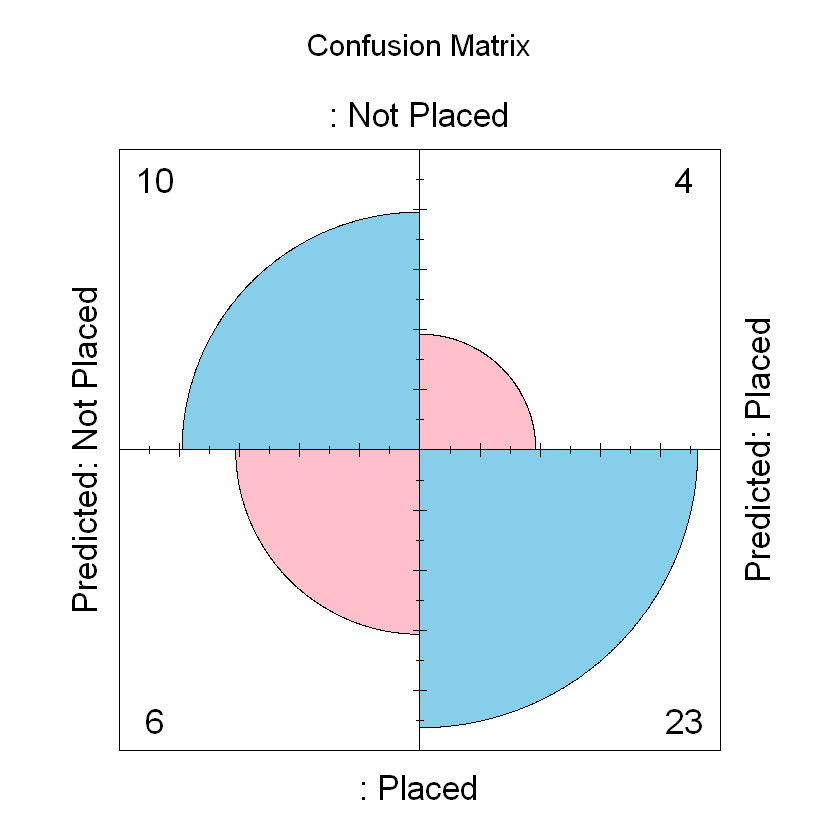

In [42]:
Predicted<-y_pred
cm <- table(test_cl$status, Predicted)
cm
fourfoldplot(cm, color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "Confusion Matrix")

In [43]:
length(test_cl$status)

[1] 43

#### Testing metrics

In [44]:
cat('Accuracy:',accuracy(test_cl$status, y_pred))#<-sum(diag(cm))/nrow(test_cl)*100
cat('\nRecall:',recall(test_cl$status, y_pred))
cat('\nPrecision:',precision(test_cl$status, y_pred))
cat('\nF1_Score:',f1_score(test_cl$status, y_pred))

Accuracy: 76.74419
Recall: 85.18519
Precision: 79.31034
F1_Score: 82.14286

In [45]:
as.data.frame(confusionMatrix(cm, positive = "Placed")[3])

,overall
,<dbl>
Accuracy,0.76744186
Kappa,0.48931116
AccuracyLower,0.61369179
AccuracyUpper,0.88244643
AccuracyNull,0.62790698
AccuracyPValue,0.03814773
McnemarPValue,0.75182963


#### Validation metrics

In [46]:
as.data.frame(confusionMatrix(cm, positive = "Placed")[4])

,byClass
,<dbl>
Sensitivity,0.8518519
Specificity,0.6250000
Pos Pred Value,0.7931034
Neg Pred Value,0.7142857
Precision,0.7931034
Recall,0.8518519
F1,0.8214286
Prevalence,0.6279070
Detection Rate,0.5348837


In [47]:
confusionMatrix(cm, positive = "Placed")

Confusion Matrix and Statistics

            Predicted
             Not Placed Placed
  Not Placed         10      4
  Placed              6     23
                                          
               Accuracy : 0.7674          
                 95% CI : (0.6137, 0.8824)
    No Information Rate : 0.6279          
    P-Value [Acc > NIR] : 0.03815         
                                          
                  Kappa : 0.4893          
                                          
 Mcnemar's Test P-Value : 0.75183         
                                          
            Sensitivity : 0.8519          
            Specificity : 0.6250          
         Pos Pred Value : 0.7931          
         Neg Pred Value : 0.7143          
             Prevalence : 0.6279          
         Detection Rate : 0.5349          
   Detection Prevalence : 0.6744          
      Balanced Accuracy : 0.7384          
                                          
       'Positive' Class : Placed   

In [48]:
lbl = LabelEncoder$new()
cat('LogLoss :',LogLoss(predict(classifier_cl, newdata = test_cl,type = "prob",interval = 'confidence')[,2],lbl$fit_transform(test_cl$status)))

LogLoss : 0.4864716

In [49]:
cat('Roc_Auc_Score :',auc(as.numeric(test_cl$status), as.numeric(y_pred)))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Roc_Auc_Score : 0.7536946

Setting levels: control = 1, case = 2

Setting direction: controls < cases



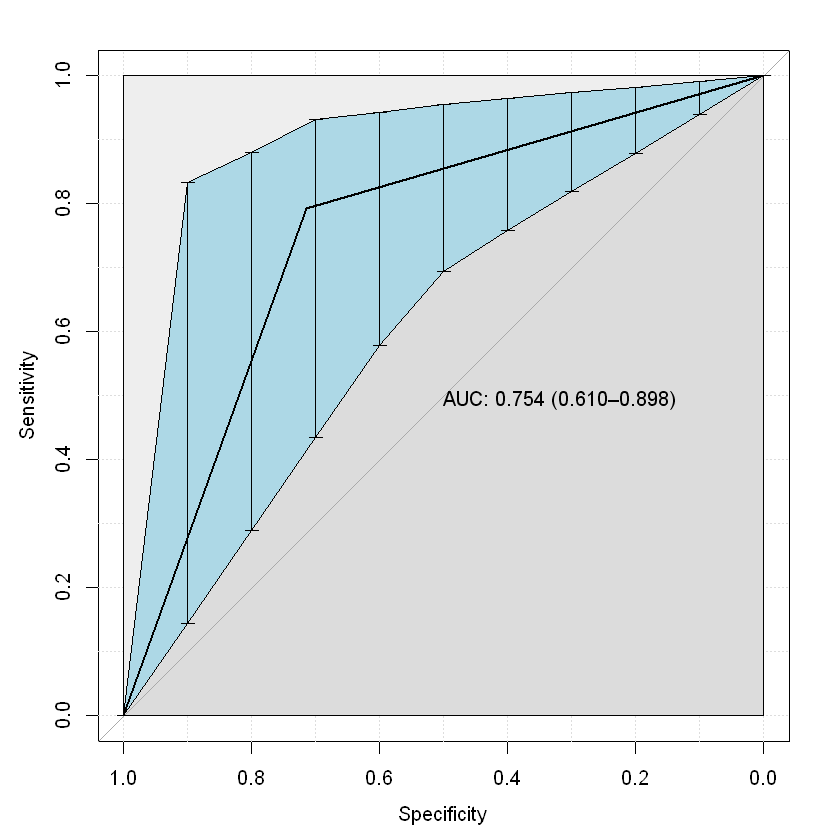

In [50]:

pROC_obj <- roc(as.numeric(test_cl$status), as.numeric(y_pred),
            smoothed = TRUE,
            # arguments for ci
            ci=TRUE, ci.alpha=0.9, stratified=FALSE,
            # arguments for plot
            plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
            print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci, type="shape", col="lightblue")
plot(sens.ci, type="bars")

### K-fold Cross Validation

<li> no. of K-folds and K-folds splits

In [51]:
k=5
fold<-KFold(df$status, nfolds = k, stratified = TRUE)

In [52]:
mnf1_nb<-list()
mnacc_nb<-list()
for(i in seq(1:k))
{
    l=c(seq(1:k))
    l<-l[-i]
    train<-df[unlist(fold[l]),]
    test<-df[unlist(fold[i]),]
    grid <- data.frame(fL=c(0,0.5,1.0), usekernel = TRUE, adjust=c(0,0.5,1.0))
    classifier_cl <- naiveBayes(status ~ ., data = train, tuneGrid=grid)
    y_pred <- predict(classifier_cl, newdata = test,interval = 'confidence')
    mnf1_nb<-append(mnf1_nb,f1_score(test$status, y_pred),after=length(mnf1_nb))
    mnacc_nb<-append(mnacc_nb,accuracy(test$status, y_pred),after=length(mnacc_nb))
}
cat('Mean Accuracy',mean(c(unlist(mnacc_nb))))
cat('\n')
cat(paste('\nAccuracy Result of Fold',c(1:5),':',unlist(mnacc_nb)))
cat('\n')
cat('\nMean f1_score',mean(c(unlist(mnf1_nb))))
cat('\n')
cat(paste('\nf1_score Result of Fold',c(1:5),':',unlist(mnf1_nb)))


Mean Accuracy 83.22844

Accuracy Result of Fold 1 : 86.3636363636364 
Accuracy Result of Fold 2 : 84.0909090909091 
Accuracy Result of Fold 3 : 86.3636363636364 
Accuracy Result of Fold 4 : 77.2727272727273 
Accuracy Result of Fold 5 : 82.051282051282

Mean f1_score 87.71825

f1_score Result of Fold 1 : 89.6551724137931 
f1_score Result of Fold 2 : 88.135593220339 
f1_score Result of Fold 3 : 90.3225806451613 
f1_score Result of Fold 4 : 82.7586206896552 
f1_score Result of Fold 5 : 87.719298245614

# Comparing with other ML models

## Logistic Regression
Logistic regression in R Programming is a classification algorithm used to find the probability of event success and event failure. Logistic regression is used when the dependent variable is binary(0/1, True/False, Yes/No) in nature. Logit function is used as a link function in a binomial distribution.

In [53]:
ind_lr<-sample(2,nrow(df),replace=TRUE,prob=c(0.8,0.2))
train_lr<-df[ind_lr==1,]
test_lr<-df[ind_lr==2,]
classifier_lr <-glm(status ~ .,data = train_lr,family = "binomial")
y_pred_lr <- predict(classifier_lr, newdata = test_lr,type = "response")
y_pred_lr <- ifelse(y_pred_lr >0.5, 1, 0)
acc<-accuracy(test_lr$status, y_pred_lr)
cat('Accuracy:',acc)

Accuracy: 88.37209

### k-fold LR

In [54]:
mnf1_lr<-list()
mnacc_lr<-list()
for(i in seq(1:k))
{
    l=c(seq(1:k))
    l<-l[-i]
    train<-df[unlist(fold[l]),]
    test<-df[unlist(fold[i]),]
    classifier_lr <-glm(status ~ .,data = train,family = "binomial")
    y <- predict(classifier_lr, newdata = test,interval = 'confidence')
    y <- ifelse(y>0.5, 1, 0)
    mnf1_lr<-append(mnf1_lr,f1_score(test$status, y),after=length(mnf1_lr))
    
    mnacc_lr<-append(mnacc_lr,accuracy(test$status, y),after=length(mnacc_lr))
}
cat('Mean Accuracy',mean(c(unlist(mnacc_lr))))
cat('\n')
cat(paste('\nAccuracy Result of Fold',c(1:5),':',unlist(mnacc_lr)))
cat('\n')
cat('\nMean f1_score',mean(c(unlist(mnf1_lr))))
cat('\n')
cat(paste('\nf1_score Result of Fold',c(1:5),':',unlist(mnf1_lr)))


Mean Accuracy 84.70862

Accuracy Result of Fold 1 : 75 
Accuracy Result of Fold 2 : 88.6363636363636 
Accuracy Result of Fold 3 : 88.6363636363636 
Accuracy Result of Fold 4 : 84.0909090909091 
Accuracy Result of Fold 5 : 87.1794871794872

Mean f1_score 88.69462

f1_score Result of Fold 1 : 81.3559322033898 
f1_score Result of Fold 2 : 91.2280701754386 
f1_score Result of Fold 3 : 91.5254237288135 
f1_score Result of Fold 4 : 88.135593220339 
f1_score Result of Fold 5 : 91.2280701754386

## K-Nearest Neighbours
K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

<h3>Label Encoding</h3><br>
<li>Label Encoder encodes the categorical data target labels with value between 0 and n_classes-1.
<li>Since we have two unique types Label encoder replaces string values to 0 and 1 for binary computation

In [55]:
lbl = LabelEncoder$new()
df_knn=df
for(i in chrDT){
df_knn[,i]<-lbl$fit_transform(df_knn[,i])
}
head(df_knn)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
6,1,55.00,1,49.80,1,2,67.25,2,1,55.0,0,51.58,0


In [56]:
ind_knn<-sample(2,nrow(df_knn),replace=TRUE,prob=c(0.8,0.2))
train_knn<-df_knn[ind_knn==1,]
test_knn<-df_knn[ind_knn==2,]
train_scale <- scale(train_knn[,1:ncol(df_knn)-1])
test_scale <- scale(test_knn[,1:ncol(df_knn)-1])
classifier_knn <-knn(train=train_scale,test=test_scale,cl=train_knn$status,k=floor(sqrt(nrow(df_knn))))
acc<-accuracy(test_knn$status, classifier_knn)
cat("Validation Accuracy:",acc)

Validation Accuracy: 87.5

### kfold of KNN

In [57]:
mnf1_knn<-list()
mnacc_knn<-list()
for(i in seq(1:k))
{
    l=c(seq(1:k))
    l<-l[-i]
    train_knn<-df_knn[unlist(fold[l]),]
    test_knn<-df_knn[unlist(fold[i]),]
    train_scale <- scale(train_knn[,1:ncol(df_knn)-1])
    test_scale <- scale(test_knn[,1:ncol(df_knn)-1])
    classifier_knn <-knn(train=train_scale,test=test_scale,cl=train_knn$status,k=floor(sqrt(nrow(df_knn))))
    mnf1_knn<-append(mnf1_knn,f1_score(test_knn$status, classifier_knn),after=length(mnf1_knn))
    mnacc_knn<-append(mnacc_knn,accuracy(test_knn$status, classifier_knn),after=length(mnacc_knn))
}
cat('Mean Accuracy',mean(c(unlist(mnacc_knn))))
cat('\n')
cat(paste('\nAccuracy Result of Fold',c(1:5),':',unlist(mnacc_knn)))
cat('\n')
cat('\nMean f1_score',mean(c(unlist(mnf1_knn))))
cat('\n')
cat(paste('\nf1_score Result of Fold',c(1:5),':',unlist(mnf1_knn)))


Mean Accuracy 81.8648

Accuracy Result of Fold 1 : 81.8181818181818 
Accuracy Result of Fold 2 : 86.3636363636364 
Accuracy Result of Fold 3 : 79.5454545454545 
Accuracy Result of Fold 4 : 79.5454545454545 
Accuracy Result of Fold 5 : 82.051282051282

Mean f1_score 88.08457

f1_score Result of Fold 1 : 87.8787878787879 
f1_score Result of Fold 2 : 90.9090909090909 
f1_score Result of Fold 3 : 86.1538461538462 
f1_score Result of Fold 4 : 86.9565217391304 
f1_score Result of Fold 5 : 88.5245901639344

 <h1> Random Forest Classifier </h1><br>
A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


In [58]:
ind_rf<-sample(2,nrow(df),replace=TRUE,prob=c(0.8,0.2))
train_rf<-df[ind_rf==1,]
test_rf<-df[ind_rf==2,]
classifier_rf <-randomForest(status ~ ., data=train_rf, importance=TRUE,proximity=TRUE)
y_pred_rf <- predict(classifier_rf, newdata = test_rf,interval = 'confidence')
acc<-accuracy(test_rf$status, y_pred_rf)
acc

[1] 83.72093

### kfold of RF

In [59]:
mnf1_rf<-list()
mnacc_rf<-list()
for(i in seq(1:k))
{
    l=c(seq(1:k))
    l<-l[-i]
    train<-df[unlist(fold[l]),]
    test<-df[unlist(fold[i]),]
    classifier_rf <-randomForest(status ~ ., data=train, importance=TRUE,proximity=TRUE)
    y <- predict(classifier_rf, newdata = test,interval = 'confidence')
    mnf1_rf<-append(mnf1_rf,f1_score(test$status, y),after=length(mnf1_rf))
    mnacc_rf<-append(mnacc_rf,accuracy(test$status, y),after=length(mnacc_rf))
}
cat('Mean Accuracy',mean(c(unlist(mnacc_rf))))
cat('\n')
cat(paste('\nAccuracy Result of Fold',c(1:5),':',unlist(mnacc_rf)))
cat('\n')
cat('\nMean f1_score',mean(c(unlist(mnf1_rf))))
cat('\n')
cat(paste('\nf1_score Result of Fold',c(1:5),':',unlist(mnf1_rf)))


Mean Accuracy 87.94872

Accuracy Result of Fold 1 : 88.6363636363636 
Accuracy Result of Fold 2 : 86.3636363636364 
Accuracy Result of Fold 3 : 90.9090909090909 
Accuracy Result of Fold 4 : 84.0909090909091 
Accuracy Result of Fold 5 : 89.7435897435898

Mean f1_score 91.60714

f1_score Result of Fold 1 : 92.063492063492 
f1_score Result of Fold 2 : 90 
f1_score Result of Fold 3 : 93.75 
f1_score Result of Fold 4 : 88.8888888888889 
f1_score Result of Fold 5 : 93.3333333333333

## Support Vector Machine 
SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces.

In [60]:
ind_svm<-sample(2,nrow(df),replace=TRUE,prob=c(0.8,0.2))
train_svm<-df[ind_svm==1,]
test_svm<-df[ind_svm==2,]
classifier_svm = svm(status ~ ., data=train_svm,type = 'C-classification',kernel = 'linear')
y_pred_svm <- predict(classifier_svm, newdata = test_svm,interval = 'confidence')
acc<-accuracy(test_svm$status, y_pred_svm)
acc

[1] 89.47368

In [61]:
k=5
#fold<-KFold(df$status, nfolds = k, stratified = TRUE)
mnf1_svm<-list()
mnacc_svm<-list()
for(i in seq(1:k))
{
    l=c(seq(1:k))
    l<-l[-i]
    train<-df[unlist(fold[l]),]
    test<-df[unlist(fold[i]),]
    classifier_svm = svm(status ~ ., data=train_svm,type = 'C-classification',kernel = 'linear')
    y <- predict(classifier_svm, newdata = test,interval = 'confidence')
    mnf1_svm<-append(mnf1_svm,f1_score(test$status, y),after=length(mnf1_svm))
    mnacc_svm<-append(mnacc_svm,accuracy(test$status, y),after=length(mnacc_svm))
}
cat('Mean Accuracy',mean(c(unlist(mnacc_svm))))
cat('\n')
cat(paste('\nAccuracy Result of Fold',c(1:k),':',unlist(mnacc_svm)))
cat('\n')
cat('\nMean f1_score',mean(c(unlist(mnf1_svm))))
cat('\n')
cat(paste('\nf1_score Result of Fold',c(1:k),':',unlist(mnf1_svm)))


Mean Accuracy 89.37063

Accuracy Result of Fold 1 : 81.8181818181818 
Accuracy Result of Fold 2 : 88.6363636363636 
Accuracy Result of Fold 3 : 95.4545454545455 
Accuracy Result of Fold 4 : 88.6363636363636 
Accuracy Result of Fold 5 : 92.3076923076923

Mean f1_score 92.40148

f1_score Result of Fold 1 : 87.0967741935484 
f1_score Result of Fold 2 : 91.5254237288135 
f1_score Result of Fold 3 : 96.6666666666667 
f1_score Result of Fold 4 : 91.8032786885246 
f1_score Result of Fold 5 : 94.9152542372881

## Models Comparision

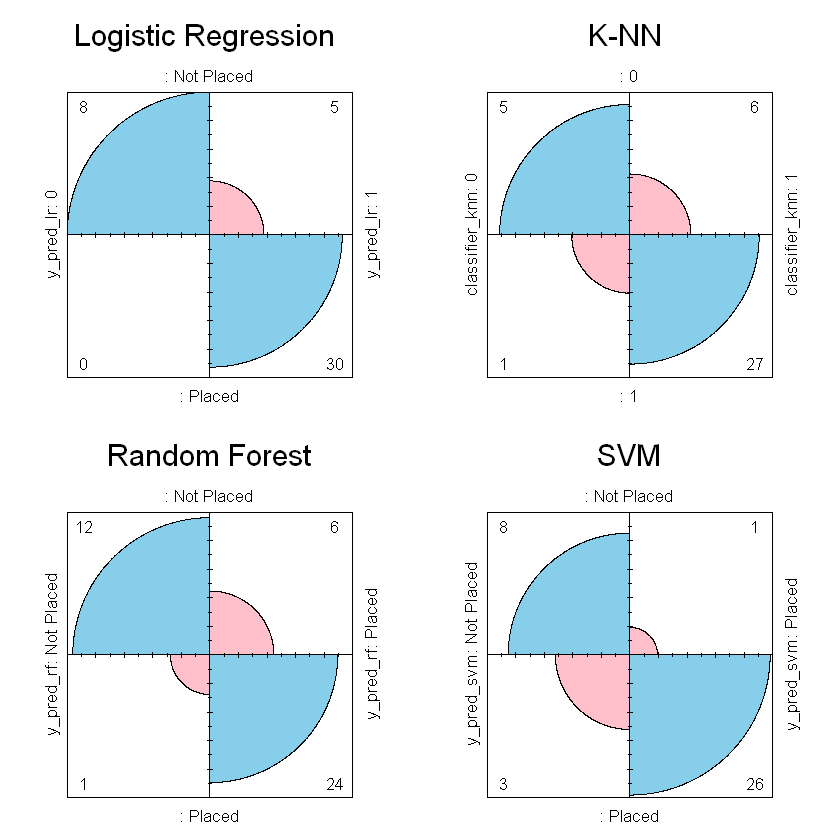

In [62]:
par(mfrow=c(2,2))
fourfoldplot(table(test_lr$status,y_pred_lr), color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "Logistic Regression ")
fourfoldplot(table(test_knn$status,classifier_knn), color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "K-NN ")
fourfoldplot(table(test_rf$status,y_pred_rf), color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "Random Forest")
fourfoldplot(table(test_svm$status,y_pred_svm), color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "SVM")


In [63]:
kacc=c(mean(c(unlist(mnacc_nb))),mean(c(unlist(mnacc_lr))),mean(c(unlist(mnacc_knn))),mean(c(unlist(mnacc_rf))),mean(c(unlist(mnacc_svm))))
kf1=c(mean(c(unlist(mnf1_nb))),mean(c(unlist(mnf1_lr))),mean(c(unlist(mnf1_knn))),mean(c(unlist(mnf1_rf))),mean(c(unlist(mnf1_svm))))
accmax=c(max(unlist(mnacc_nb)),max(unlist(mnacc_lr)),max(unlist(mnacc_knn)),max(unlist(mnacc_rf)),max(unlist(mnacc_svm)))
accmin=c(min(unlist(mnacc_nb)),min(unlist(mnacc_lr)),min(unlist(mnacc_knn)),min(unlist(mnacc_rf)),min(unlist(mnacc_svm)))
f1max=c(max(unlist(mnf1_nb)),max(unlist(mnf1_lr)),max(unlist(mnf1_knn)),max(unlist(mnf1_rf)),max(unlist(mnf1_svm)))
f1min=c(min(unlist(mnf1_nb)),min(unlist(mnf1_lr)),min(unlist(mnf1_knn)),min(unlist(mnf1_rf)),min(unlist(mnf1_svm)))
model_df=data.frame(Algorithm=c('Naive Bayes','Logistic Regression','K-Nearest Neighbours','Random Forest',"Support Vector Machine"),Min_Accuracy=accmin,Max_Accuracy=f1max,Min_F1score=f1min,Max_F1score=accmax,KFold_Accuracy=kacc,KFold_F1score=kf1)

model_df

Algorithm,Min_Accuracy,Max_Accuracy,Min_F1score,Max_F1score,KFold_Accuracy,KFold_F1score
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Naive Bayes,77.27273,90.32258,82.75862,86.36364,83.22844,87.71825
Logistic Regression,75.00000,91.52542,81.35593,88.63636,84.70862,88.69462
K-Nearest Neighbours,79.54545,90.90909,86.15385,86.36364,81.86480,88.08457
Random Forest,84.09091,93.75000,88.88889,90.90909,87.94872,91.60714
Support Vector Machine,81.81818,96.66667,87.09677,95.45455,89.37063,92.40148


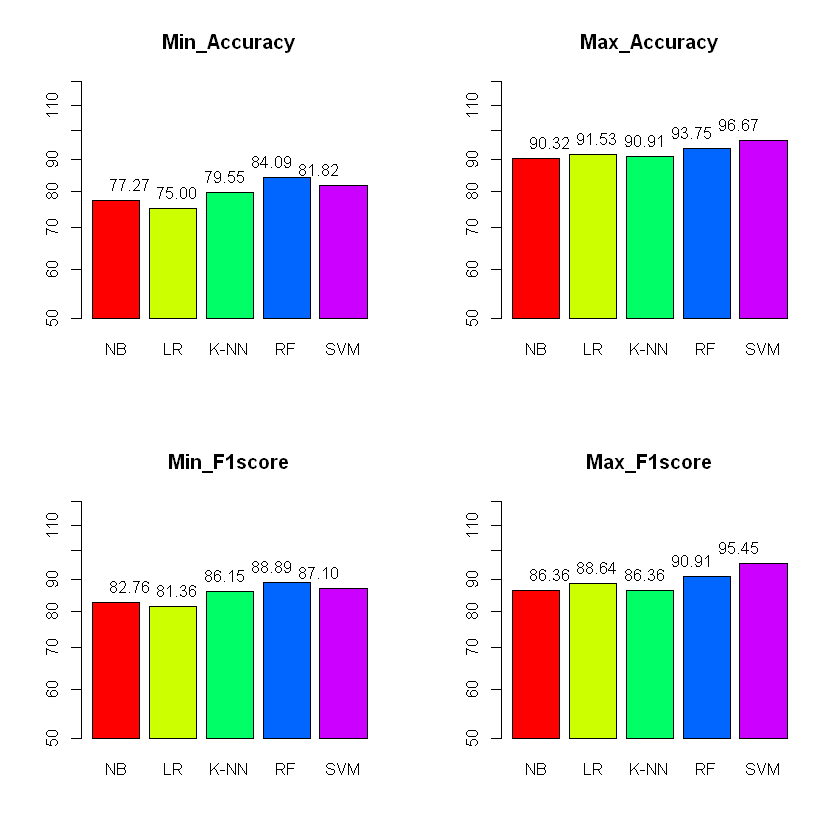

In [64]:
par(mfrow=c(2,2))
fn<-function(x){
    return (format(round(x, 2), nsmall = 2))
}
labs=c('NB','LR','K-NN','RF','SVM')
barplot(model_df$Min_Accuracy,ylim=c(50,120),names.arg=labs,col=rainbow(5), log="y",main='Min_Accuracy')
text(model_df$Min_Accuracy,labels =sapply(model_df$Min_Accuracy,fn),pos=3,cex=1)

barplot(model_df$Max_Accuracy,ylim=c(50,120),names.arg=labs,col=rainbow(5), log="y",main='Max_Accuracy')
text(model_df$Max_Accuracy,labels =sapply(model_df$Max_Accuracy,fn),pos=3,cex=1)

barplot(model_df$Min_F1score,ylim=c(50,120),names.arg=labs,col=rainbow(5), log="y",main='Min_F1score')
text(model_df$Min_F1score,labels =sapply(model_df$Min_F1score,fn),pos=3,cex=1)

barplot(model_df$Max_F1score,ylim=c(50,120),names.arg=labs,col=rainbow(5), log="y",main='Max_F1score')
text(model_df$Max_F1score,labels =sapply(model_df$Max_F1score,fn),pos=3,cex=1)

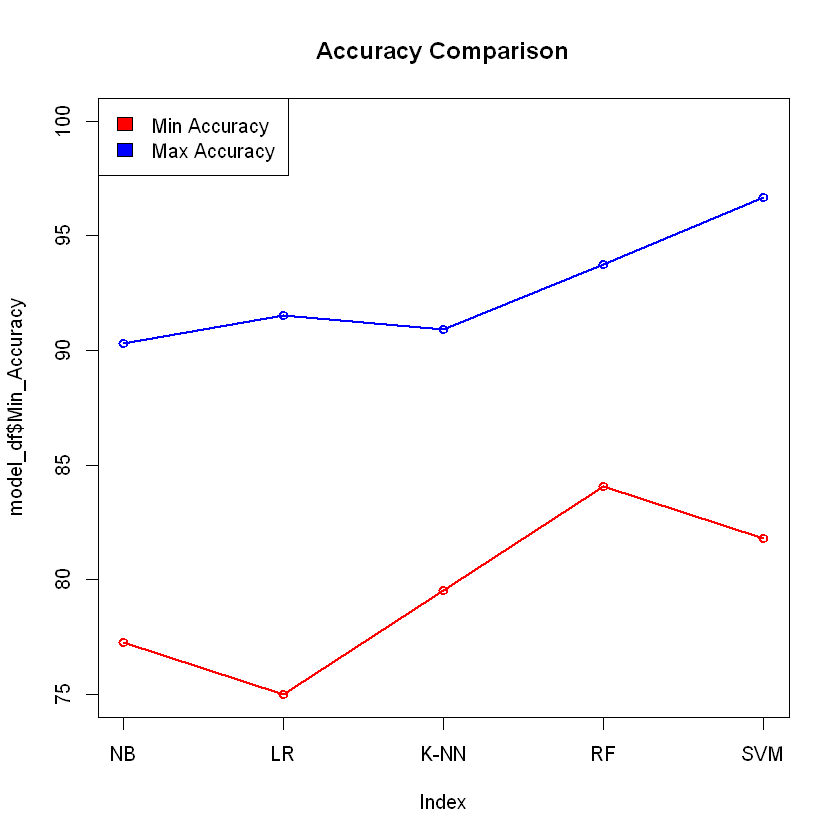

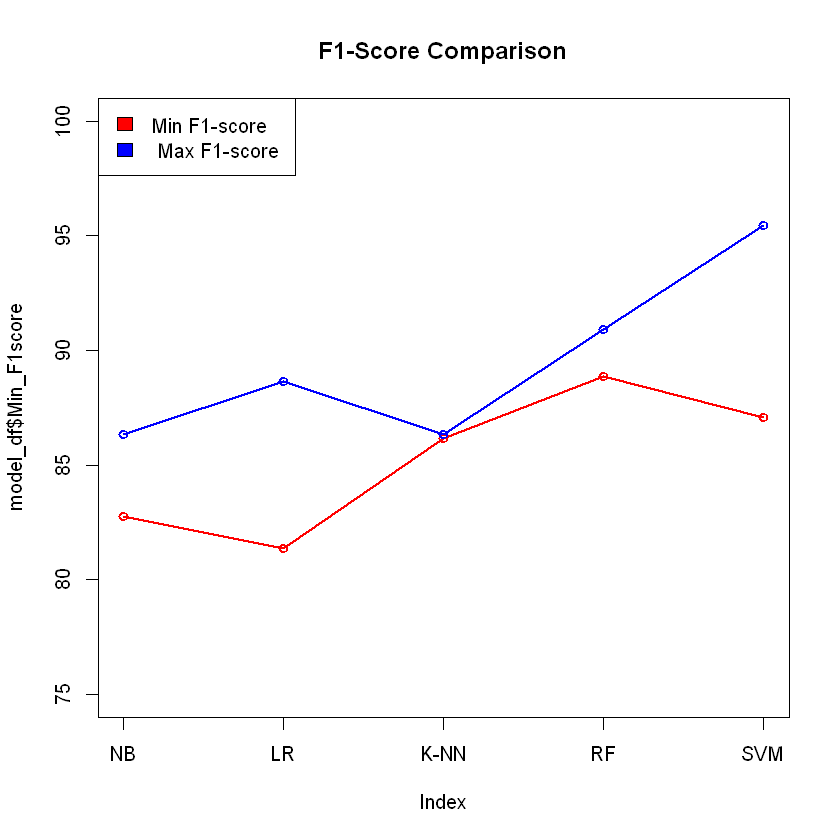

In [65]:
plot(model_df$Min_Accuracy,type = "o",col='red',ylim=c(75,100),lwd=2.0, xaxt = "n",main='Accuracy Comparison')
axis(1, at=1:5, labels=labs)
lines(model_df$Max_Accuracy, type = "o", col = "blue",lwd=2.0)
legend("topleft",c("Min Accuracy","Max Accuracy"),fill = c('red','blue'))

plot(model_df$Min_F1score,type = "o",col='red',ylim=c(75,100),lwd=2.0, xaxt = "n",main='F1-Score Comparison')
axis(1, at=1:5, labels=labs)
lines(model_df$Max_F1score, type = "o", col = "blue",lwd=2.0)
legend("topleft",c("Min F1-score"," Max F1-score"),fill = c('red','blue'))

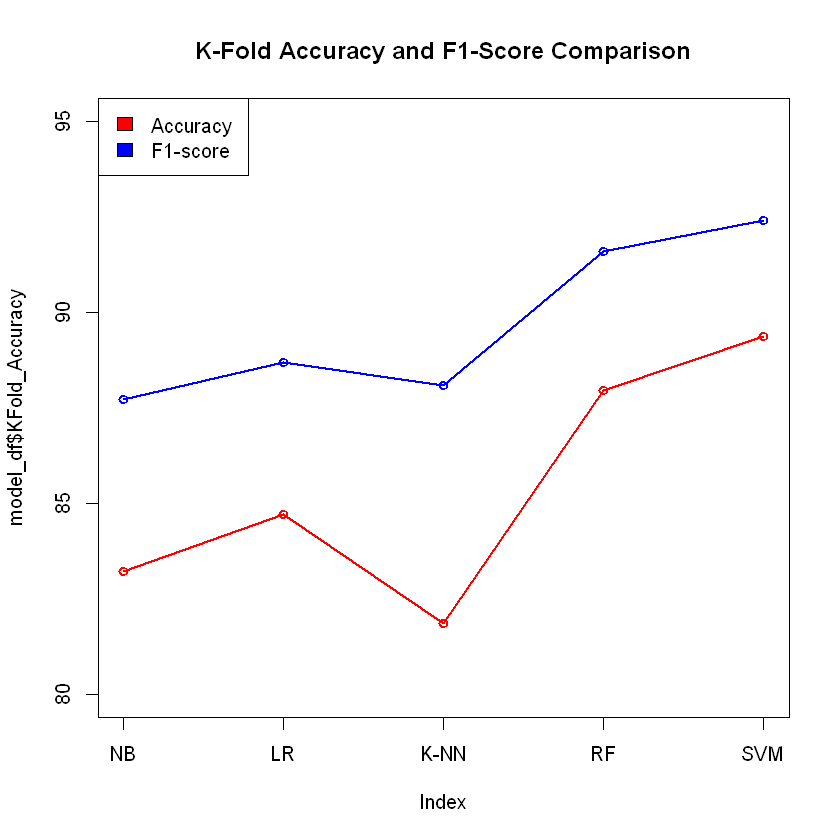

In [66]:
plot(model_df$KFold_Accuracy,type = "o",col='red',ylim=c(80,95),lwd=2.0, xaxt = "n",main='K-Fold Accuracy and F1-Score Comparison')
axis(1, at=1:5, labels=labs)
lines(model_df$KFold_F1score, type = "o", col = "blue",lwd=2.0)
legend("topleft",c("Accuracy","F1-score"),fill = c('red','blue'))

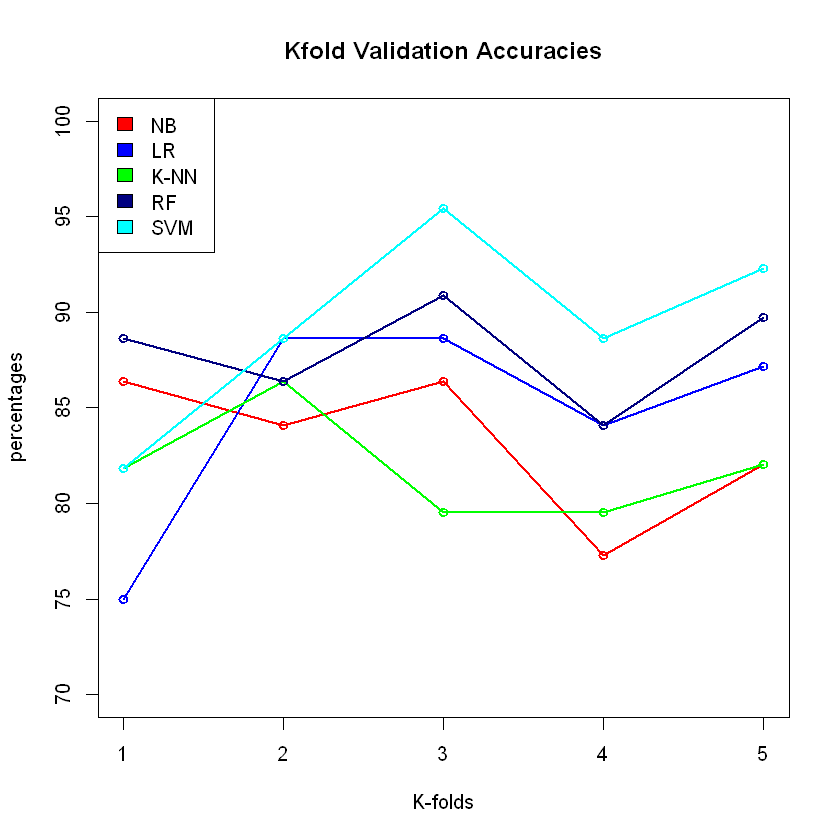

In [67]:
plot(unlist(mnacc_nb),type = "o",col='red',ylim=c(70,100),lwd=2.0, xaxt = "n",main='Kfold Validation Accuracies',xlab='K-folds',ylab='percentages')
axis(1, at=1:5, labels=c(1:5))
lines(unlist(mnacc_lr), type = "o", col = "blue",lwd=2.0)
lines(unlist(mnacc_knn), type = "o", col = "green",lwd=2.0)
lines(unlist(mnacc_rf), type = "o", col = "navy",lwd=2.0)
lines(unlist(mnacc_svm), type = "o", col = "cyan",lwd=2.0)
legend("topleft",c('NB','LR','K-NN','RF','SVM'),fill = c('red','blue',"green","navy","cyan"))


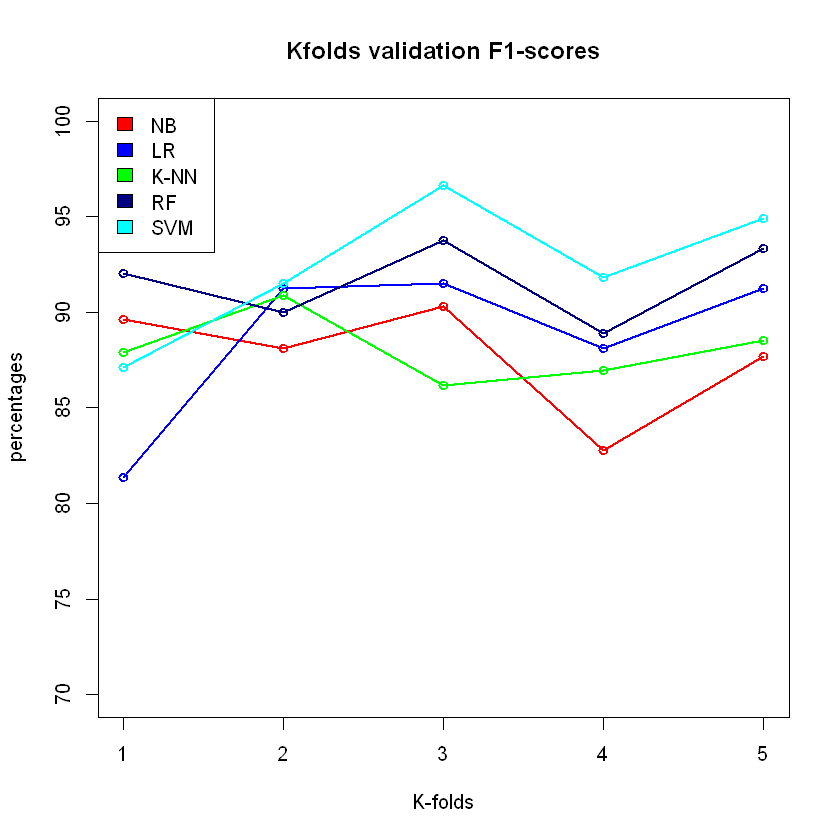

In [68]:
plot(unlist(mnf1_nb),type = "o",col='red',ylim=c(70,100),lwd=2.0, xaxt = "n",main='Kfolds validation F1-scores',xlab='K-folds',ylab='percentages')
axis(1, at=1:5, labels=c(1:5))
lines(unlist(mnf1_lr), type = "o", col = "blue",lwd=2.0)
lines(unlist(mnf1_knn), type = "o", col = "green",lwd=2.0)
lines(unlist(mnf1_rf), type = "o", col = "navy",lwd=2.0)
lines(unlist(mnf1_svm), type = "o", col = "cyan",lwd=2.0)
legend("topleft",c('NB','LR','K-NN','RF','SVM'),fill = c('red','blue',"green","navy","cyan"))

# Random Sampling Experiment
Random sampling, or probability sampling, is a sampling method that allows for the randomization of sample selection, i.e., each sample has the same probability as other samples to be selected to serve as a representation of an entire population.

In [148]:
for(i in 1:500)
{
    ind<-sample(2,nrow(df),replace=TRUE,prob=c(0.8,0.2))
    train<-df[ind==1,]
    test<-df[ind==2,]
    grid <- data.frame(fL=c(0,0.5,1.0), usekernel = TRUE, adjust=c(0,0.5,1.0))
    classifier<- naive_bayes(status ~ ., data = train, tuneGrid=grid)
    y_pred <- predict(classifier, newdata = test,interval = 'confidence')
    acc=accuracy(test$status,y_pred)
    if(acc==100)
        break
    loss_vd<-LogLoss(predict(classifier, newdata = train,type = "prob",interval = 'confidence')[,2],lbl$fit_transform(train$status))
    loss_ts<-LogLoss(predict(classifier, newdata = test,type = "prob",interval = 'confidence')[,2],lbl$fit_transform(test$status))
    if(loss_ts<=0.149 )
        break
}

cat('Validation Loss:',loss_vd,"\nTesting Loss:",loss_ts)
print(acc)

Validation Loss: 0.3951125 
Testing Loss: 0.2921759[1] 100


In [149]:
ind
df_in<-as.list(ind)
df_in

[1] 1 2 1 1 1 2 2 1 2 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1
 [38] 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2
 [75] 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 2 1 1 1 1
[149] 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 2 1 1 2 1 1 1
[186] 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1

[[1]]
[1] 1

[[2]]
[1] 2

[[3]]
[1] 1

[[4]]
[1] 1

[[5]]
[1] 1

[[6]]
[1] 2

[[7]]
[1] 2

[[8]]
[1] 1

[[9]]
[1] 2

[[10]]
[1] 1

[[11]]
[1] 1

[[12]]
[1] 1

[[13]]
[1] 1

[[14]]
[1] 1

[[15]]
[1] 2

[[16]]
[1] 1

[[17]]
[1] 1

[[18]]
[1] 1

[[19]]
[1] 2

[[20]]
[1] 1

[[21]]
[1] 1

[[22]]
[1] 1

[[23]]
[1] 1

[[24]]
[1] 1

[[25]]
[1] 1

[[26]]
[1] 1

[[27]]
[1] 1

[[28]]
[1] 1

[[29]]
[1] 1

[[30]]
[1] 1

[[31]]
[1] 2

[[32]]
[1] 1

[[33]]
[1] 1

[[34]]
[1] 1

[[35]]
[1] 2

[[36]]
[1] 1

[[37]]
[1] 1

[[38]]
[1] 1

[[39]]
[1] 1

[[40]]
[1] 2

[[41]]
[1] 1

[[42]]
[1] 1

[[43]]
[1] 1

[[44]]
[1] 1

[[45]]
[1] 1

[[46]]
[1] 1

[[47]]
[1] 1

[[48]]
[1] 1

[[49]]
[1] 1

[[50]]
[1] 1

[[51]]
[1] 1

[[52]]
[1] 2

[[53]]
[1] 1

[[54]]
[1] 1

[[55]]
[1] 1

[[56]]
[1] 1

[[57]]
[1] 1

[[58]]
[1] 1

[[59]]
[1] 1

[[60]]
[1] 1

[[61]]
[1] 1

[[62]]
[1] 1

[[63]]
[1] 2

[[64]]
[1] 1

[[65]]
[1] 1

[[66]]
[1] 1

[[67]]
[1] 1

[[68]]
[1] 1

[[69]]
[1] 2

[[70]]
[1] 1

[[71]]
[1] 1

[[72]]
[1] 1

[[73]]
[1] 1

[[74]]
[1] 2

[[75]]
[1] 1

[[76]]
[1] 1

[[77]]
[1] 1

[[78]]
[1] 1

[[79]]
[1] 1

[[80]]
[1] 1

[[81]]
[1] 1

[[82]]
[1] 1

[[83]]
[1] 1

[[84]]
[1] 1

[[85]]
[1] 2

[[86]]
[1] 1

[[87]]
[1] 1

[[88]]
[1] 1

[[89]]
[1] 2

[[90]]
[1] 1

[[91]]
[1] 1

[[92]]
[1] 1

[[93]]
[1] 2

[[94]]
[1] 1

[[95]]
[1] 1

[[96]]
[1] 1

[[97]]
[1] 1

[[98]]
[1] 1

[[99]]
[1] 2

[[100]]
[1] 1

[[101]]
[1] 1

[[102]]
[1] 1

[[103]]
[1] 1

[[104]]
[1] 1

[[105]]
[1] 1

[[106]]
[1] 1

[[107]]
[1] 1

[[108]]
[1] 1

[[109]]
[1] 2

[[110]]
[1] 1

[[111]]
[1] 1

[[112]]
[1] 1

[[113]]
[1] 1

[[114]]
[1] 1

[[115]]
[1] 1

[[116]]
[1] 1

[[117]]
[1] 1

[[118]]
[1] 1

[[119]]
[1] 1

[[120]]
[1] 1

[[121]]
[1] 1

[[122]]
[1] 1

[[123]]
[1] 1

[[124]]
[1] 1

[[125]]
[1] 1

[[126]]
[1] 1

[[127]]
[1] 1

[[128]]
[1] 1

[[129]]
[1] 1

[[130]]
[1] 2

[[131]]
[1] 1

[[132]]
[1] 1

[[133]]
[1] 1

[[134]]
[1] 1

[[135]]
[1] 2

[[136]]
[1] 1

[[137]]
[1] 1

[[138]]
[1] 1

[[139]]
[1] 1

[[140]]
[1] 1

[[141]]
[1] 2

[[142]]
[1] 1

[[143]]
[1] 1

[[144]]
[1] 2

[[145]]
[1] 1

[[146]]
[1] 1

[[147]]
[1] 1

[[148]]
[1] 1

[[149]]
[1] 1

[[150]]
[1] 2

[[151]]
[1] 1

[[152]]
[1] 1

[[153]]
[1] 1

[[154]]
[1] 1

[[155]]
[1] 1

[[156]]
[1] 2

[[157]]
[1] 1

[[158]]
[1] 1

[[159]]
[1] 1

[[160]]
[1] 1

[[161]]
[1] 1

[[162]]
[1] 1

[[163]]
[1] 1

[[164]]
[1] 1

[[165]]
[1] 1

[[166]]
[1] 1

[[167]]
[1] 1

[[168]]
[1] 1

[[169]]
[1] 1

[[170]]
[1] 2

[[171]]
[1] 1

[[172]]
[1] 1

[[173]]
[1] 1

[[174]]
[1] 1

[[175]]
[1] 1

[[176]]
[1] 1

[[177]]
[1] 1

[[178]]
[1] 2

[[179]]
[1] 2

[[180]]
[1] 1

[[181]]
[1] 1

[[182]]
[1] 2

[[183]]
[1] 1

[[184]]
[1] 1

[[185]]
[1] 1

[[186]]
[1] 1

[[187]]
[1] 2

[[188]]
[1] 2

[[189]]
[1] 1

[[190]]
[1] 1

[[191]]
[1] 1

[[192]]
[1] 1

[[193]]
[1] 1

[[194]]
[1] 1

[[195]]
[1] 1

[[196]]
[1] 1

[[197]]
[1] 1

[[198]]
[1] 1

[[199]]
[1] 1

[[200]]
[1] 1

[[201]]
[1] 1

[[202]]
[1] 1

[[203]]
[1] 1

[[204]]
[1] 1

[[205]]
[1] 1

[[206]]
[1] 1

[[207]]
[1] 1

[[208]]
[1] 1

[[209]]
[1] 1

[[210]]
[1] 2

[[211]]
[1] 1

[[212]]
[1] 1

[[213]]
[1] 1

[[214]]
[1] 1

[[215]]
[1] 1

## Better Performing Model

<li> Getting Better performing Random sampled data 

In [151]:
inds<-readRDS("indices2.RData") 
class(inds)

[1] "list"

In [152]:
train_ne<-df[unlist(inds)==1,]
test_ne<-df[unlist(inds)==2,]

In [153]:
#set.seed(120)  # Setting Seed
grid <- data.frame(fL=c(0,0.5,1.0), usekernel = TRUE, adjust=c(0,0.5,1.0))
classifier_ne <- naive_bayes(status ~ ., data =train_ne, tuneGrid=grid)
classifier_ne


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = status ~ ., data = train_ne, tuneGrid = grid)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

Not Placed     Placed 
  0.298913   0.701087 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: gender (Bernoulli) 
--------------------------------------------------------------------------------- 
      
gender Not Placed    Placed
     F  0.4363636 0.3178295
     M  0.5636364 0.6821705

--------------------------------------------------------------------------------- 
 ::: ssc_p (Gaussian) 
------------------------------------------------------------------------------

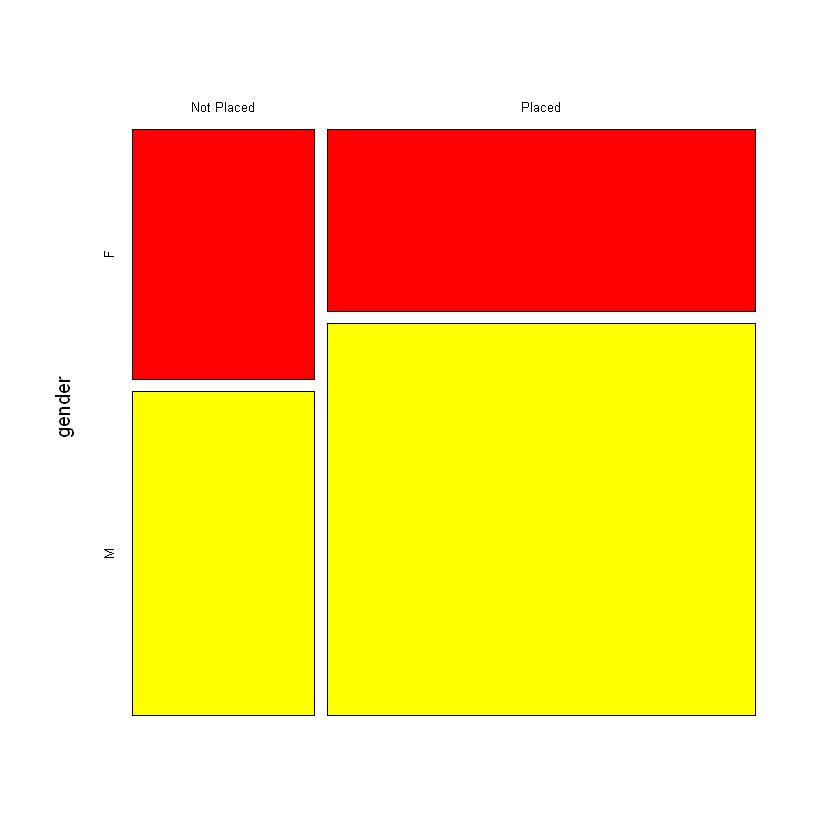

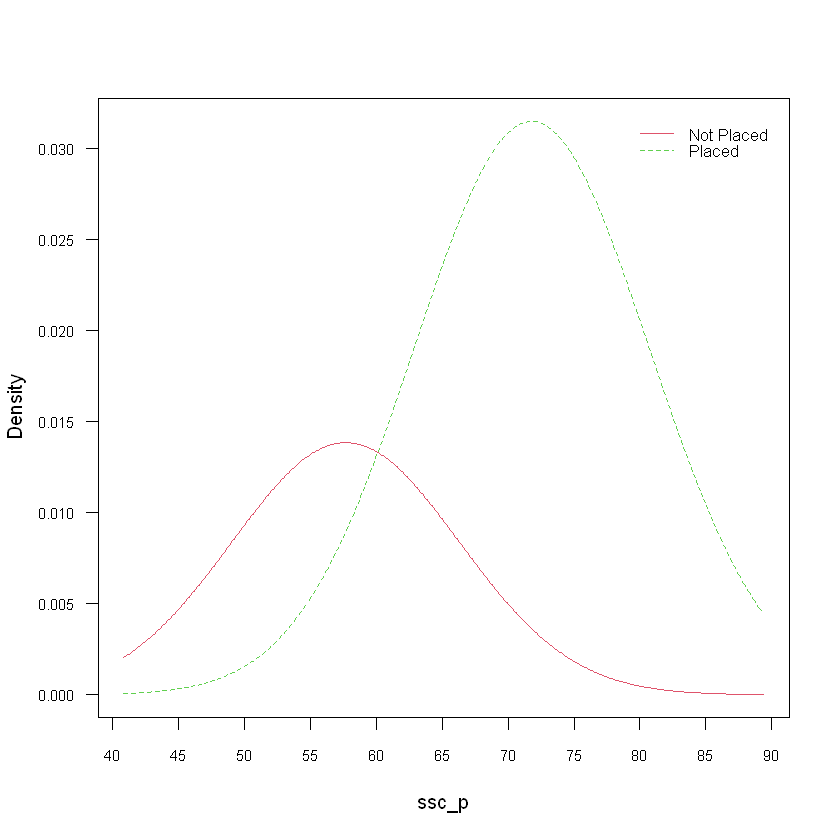

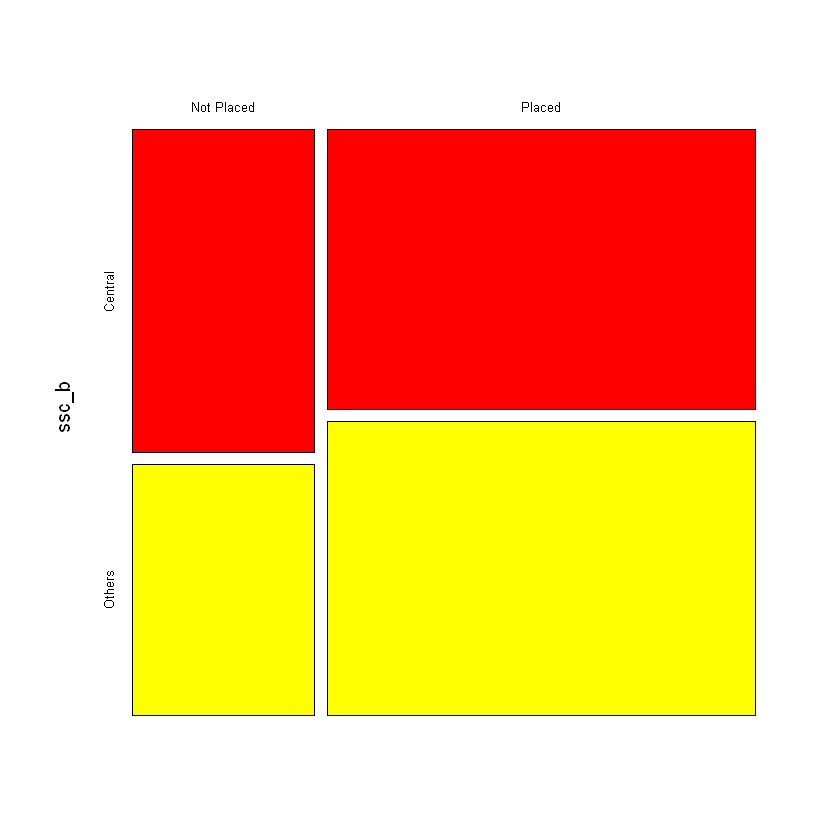

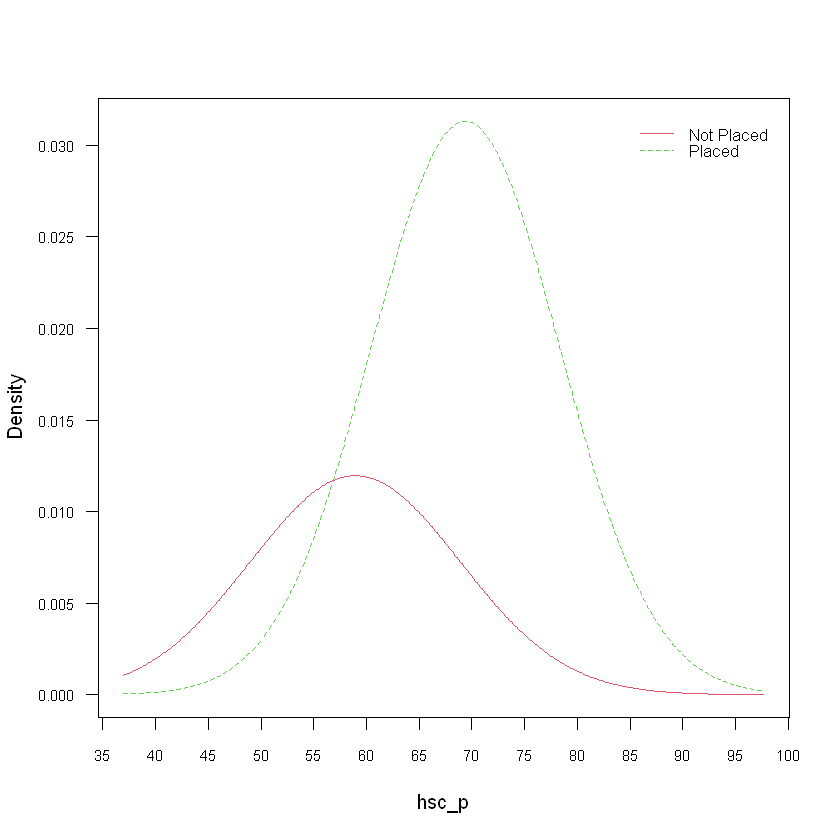

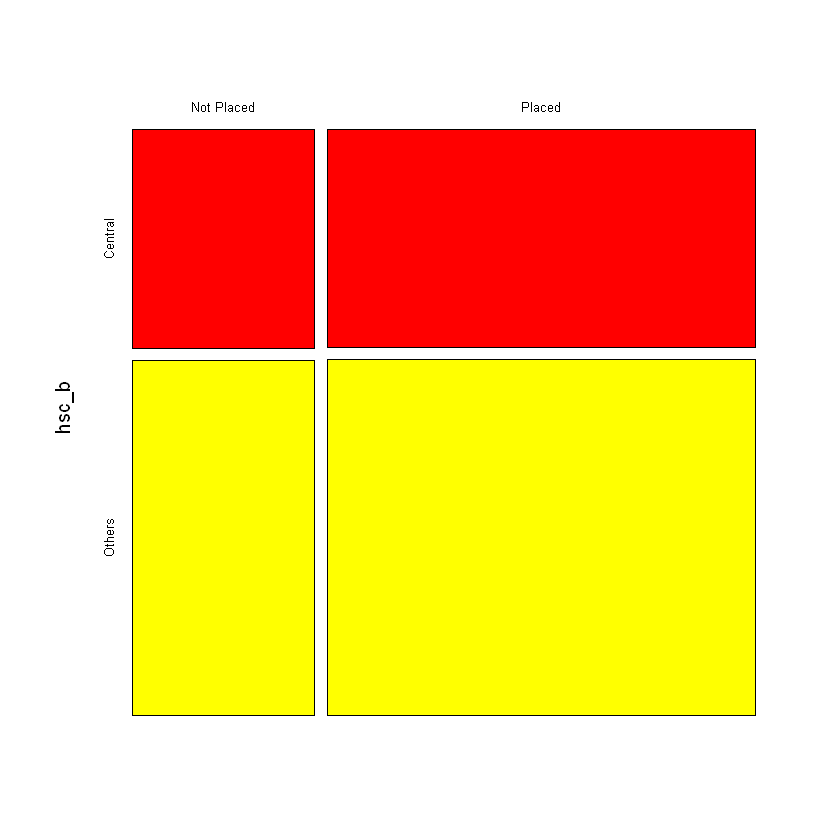

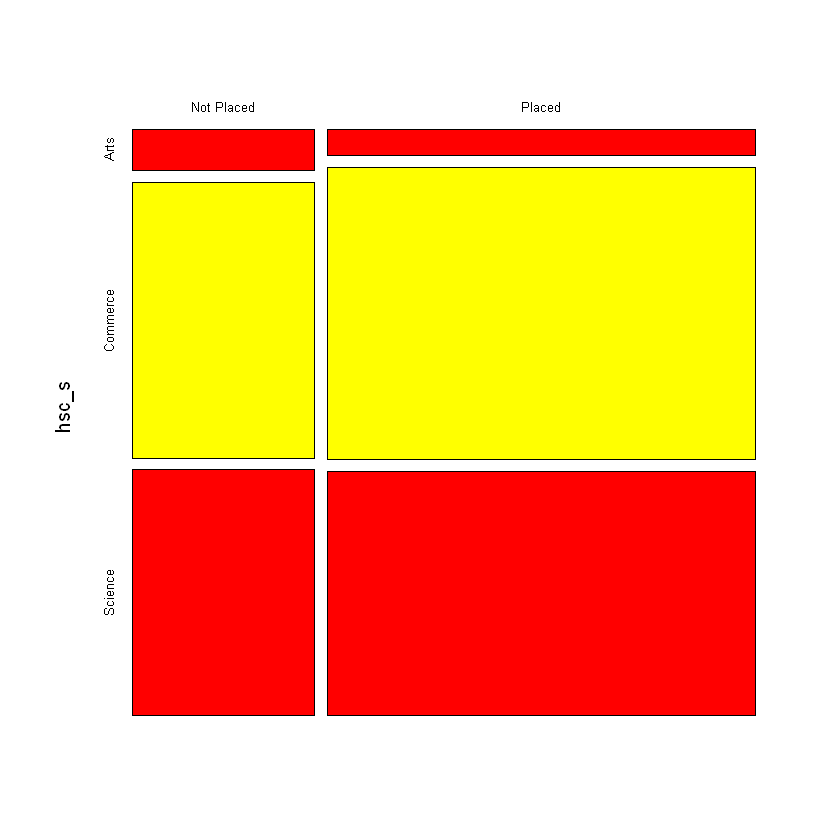

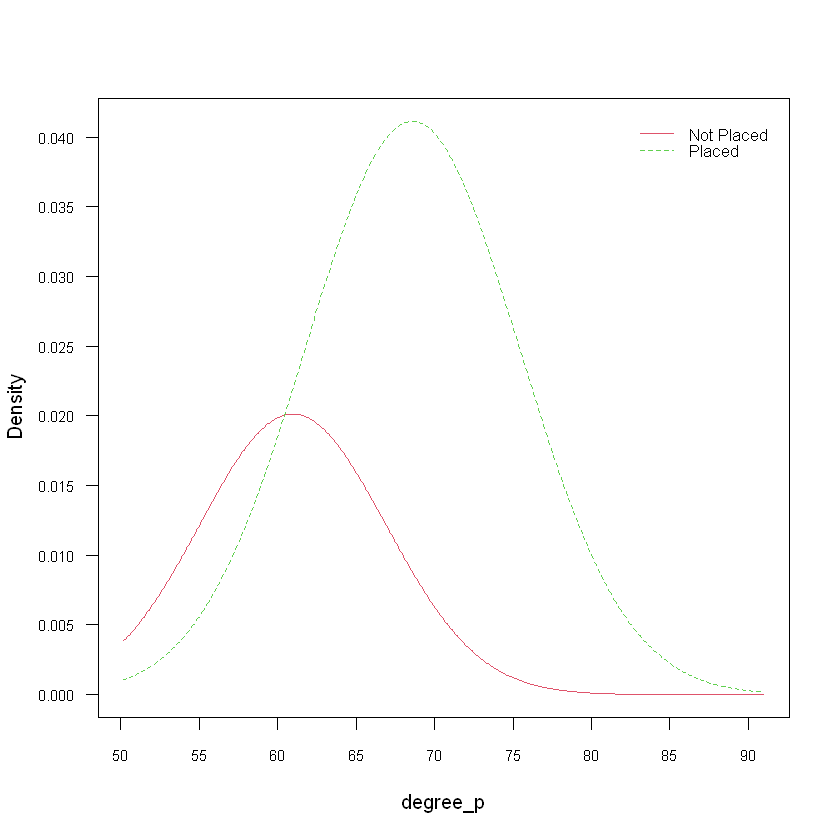

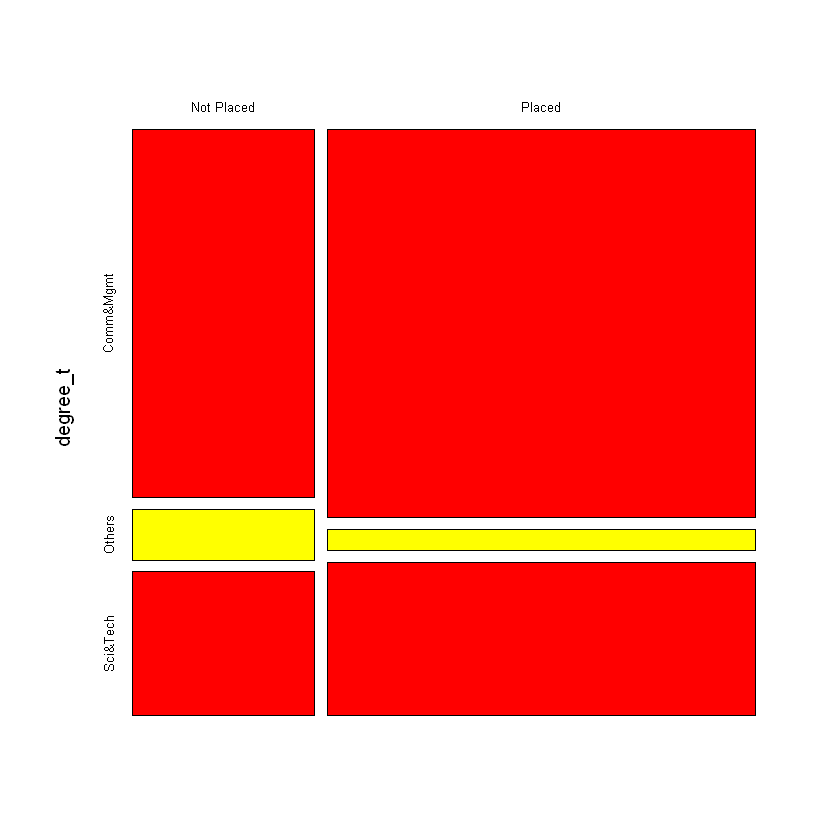

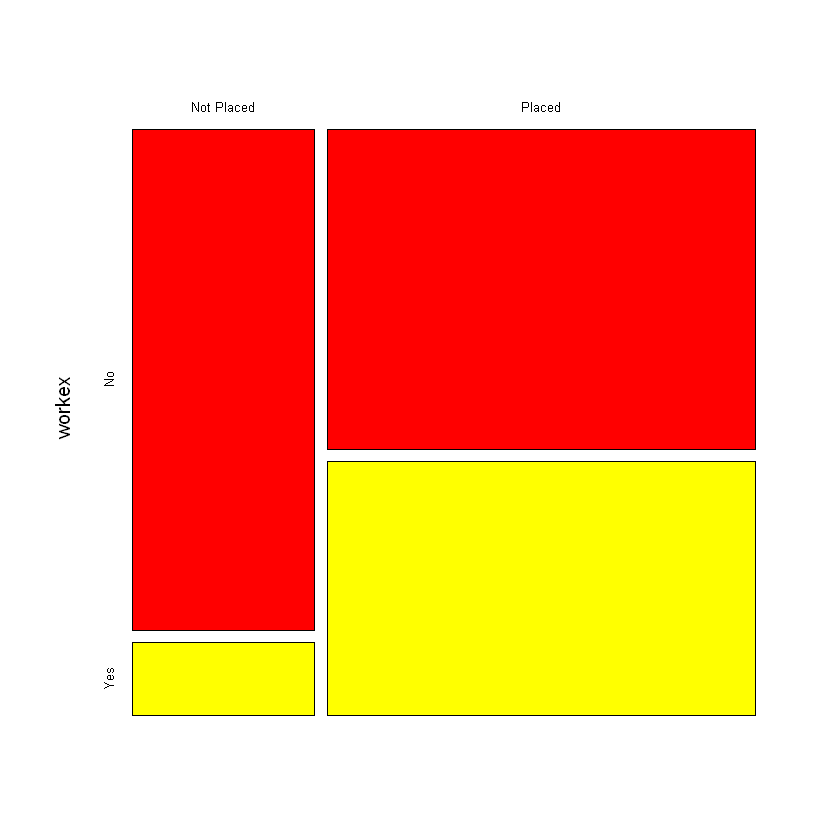

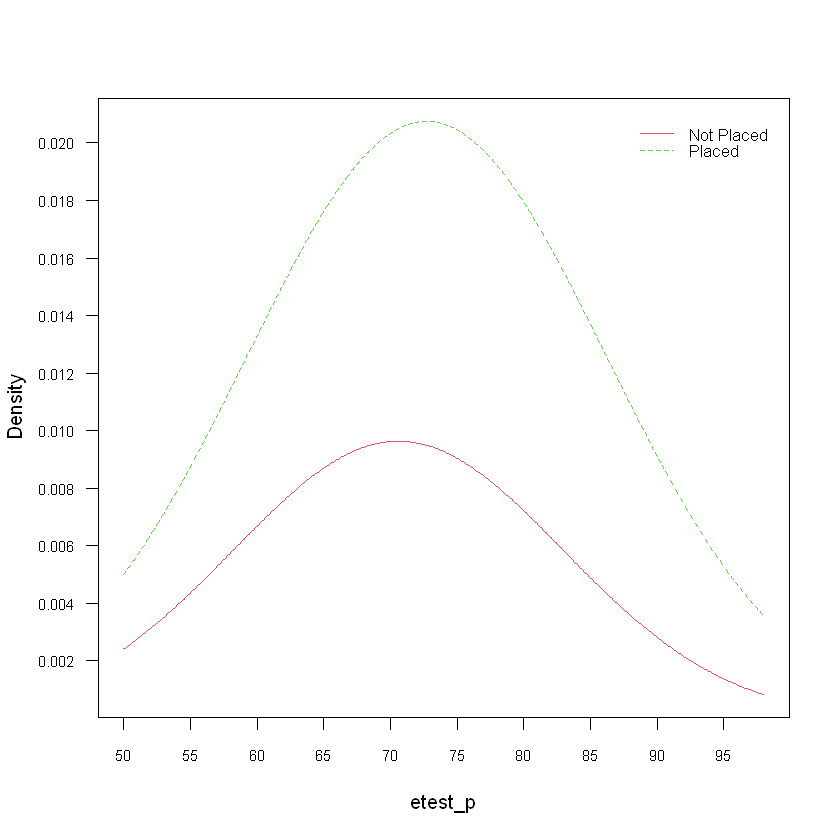

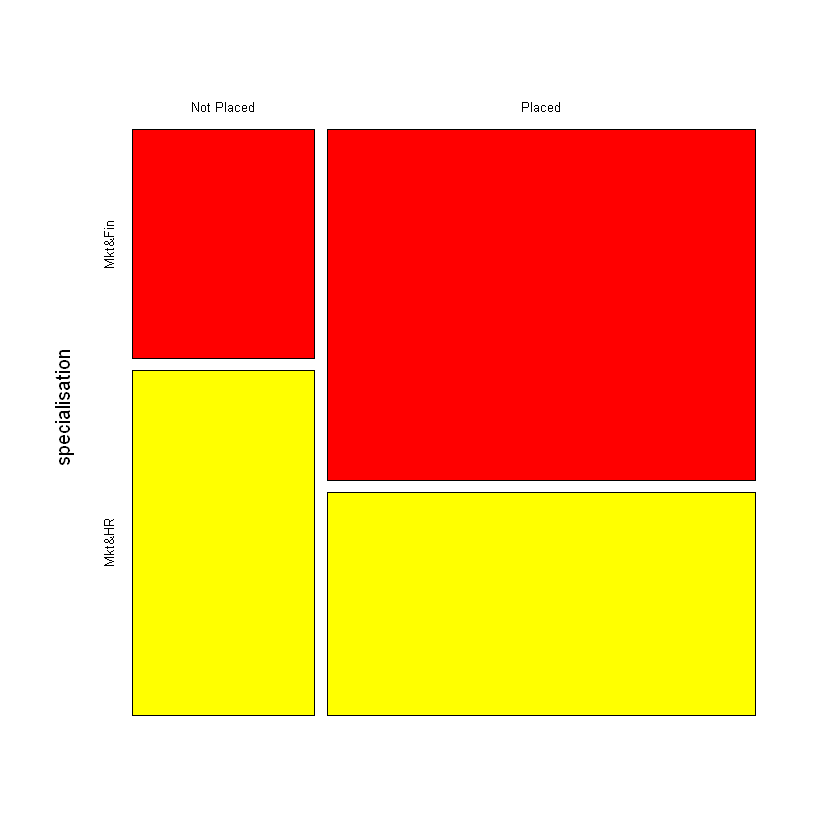

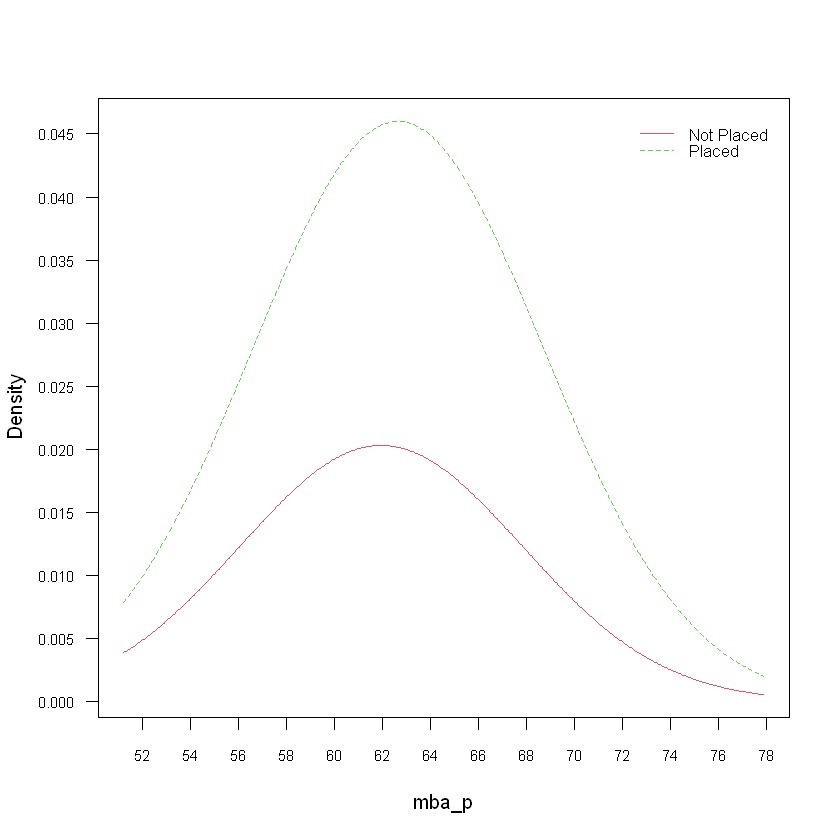

In [154]:
plot(classifier_ne)

## Model Validation

In [155]:
y_pred_ne<- predict(classifier_ne, newdata = train_ne,interval = 'confidence')
y_pred_ne

[1] Placed     Placed     Not Placed Placed     Placed     Not Placed
  [7] Not Placed Placed     Not Placed Placed     Placed     Placed    
 [13] Not Placed Placed     Placed     Placed     Placed     Placed    
 [19] Placed     Not Placed Placed     Placed     Placed     Not Placed
 [25] Not Placed Placed     Placed     Placed     Not Placed Placed    
 [31] Placed     Placed     Placed     Not Placed Placed     Placed    
 [37] Placed     Placed     Placed     Placed     Not Placed Placed    
 [43] Not Placed Placed     Placed     Not Placed Placed     Placed    
 [49] Placed     Placed     Placed     Placed     Placed     Placed    
 [55] Not Placed Placed     Placed     Placed     Placed     Placed    
 [61] Placed     Placed     Placed     Placed     Placed     Placed    
 [67] Placed     Placed     Placed     Placed     Placed     Placed    
 [73] Placed     Not Placed Placed     Placed     Not Placed Not Placed
 [79] Not Placed Placed     Placed     Placed     Placed     Not Placed
 [85] Placed     Placed     Placed     Placed     Not Placed Not Placed
 [91] Placed     Not Placed Placed     Not Placed Not Placed Placed    
 [97] Placed     Placed     Placed     Placed     Placed     Placed    
[103] Not Placed Placed     Placed     Placed     Placed     Placed    
[109] Placed     Placed     Placed     Not Placed Placed     Placed    
[115] Placed     Placed     Not Placed Placed     Placed     Placed    
[121] Not Placed Placed     Not Placed Placed     Not Placed Placed    
[127] Placed     Placed     Placed     Placed     Not Placed Not Placed
[133] Placed     Placed     Placed     Not Placed Placed     Not Placed
[139] Placed     Placed     Placed     Placed     Placed     Placed    
[145] Not Placed Not Placed Placed     Not Placed Not Placed Placed    
[151] Placed     Not Placed Placed     Placed     Not Placed Placed    
[157] Not Placed Placed     Not Placed Placed     Placed     Placed    
[163] Placed     Not Placed Not Placed Placed     Placed     Placed    
[169] Placed     Not Placed Placed     Not Placed Placed     Not Placed
[175] Placed     Placed     Not Placed Placed     Not Placed Placed    
[181] Placed     Placed     Placed     Not Placed
Levels: Not Placed Placed

            y_pred_ne
             Not Placed Placed
  Not Placed         38     17
  Placed             12    117

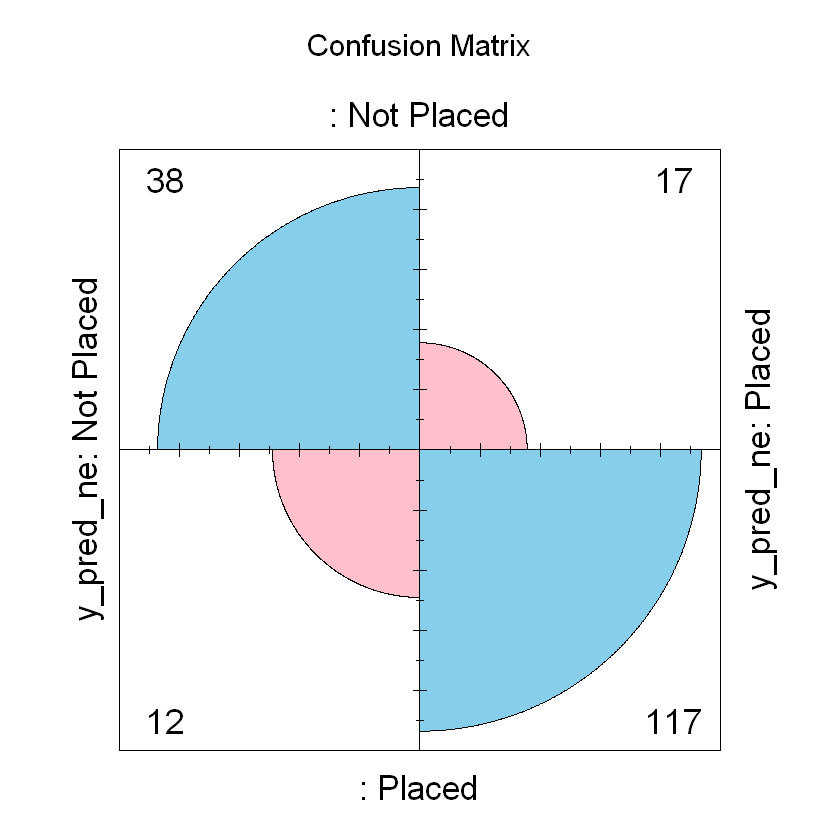

In [156]:
cm <- table(train_ne$status, y_pred_ne)
cm
fourfoldplot(cm, color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "Confusion Matrix")

In [157]:
cat('Accuracy:',accuracy(train_ne$status, y_pred_ne))#<-sum(diag(cm))/nrow(test_cl)*100
cat('\nRecall:',recall(train_ne$status, y_pred_ne))
cat('\nPrecision:',precision(train_ne$status, y_pred_ne))
cat('\nF1_Score:',f1_score(train_ne$status, y_pred_ne))

Accuracy: 84.23913
Recall: 87.31343
Precision: 90.69767
F1_Score: 88.97338

## Performance Testing 
<Strong>Possible Performance metrics for classification problem are</Strong><br>
<li>Confusion Matrix
<li>Accuracy score
<li>F1score (balances the precision and recall)
<li>Log loss
<li>ROC curve
<li>ROC-AUC score(Area Under Curve in ROC Graph)

In [158]:
y_pred_ne<- predict(classifier_ne, newdata = test_ne,interval = 'confidence')
y_pred_ne

[1] Placed     Not Placed Not Placed Placed     Not Placed Not Placed
 [7] Placed     Not Placed Placed     Not Placed Placed     Not Placed
[13] Placed     Placed     Placed     Placed     Placed     Placed    
[19] Placed     Placed     Placed     Placed     Not Placed Not Placed
[25] Not Placed Placed     Placed     Not Placed Not Placed Placed    
[31] Placed    
Levels: Not Placed Placed

In [159]:
# Predicting probs
y_pred_prbs<- predict(classifier_ne, newdata = test_ne,type = "prob",interval = 'confidence')
y_pred_prbs

Not Placed,Placed
4.269575e-05,0.999957304
6.448427e-01,0.355157315
7.961829e-01,0.203817141
2.855769e-03,0.997144231
9.933962e-01,0.006603803
6.871686e-01,0.312831396
1.200553e-01,0.879944742
9.922527e-01,0.007747293
6.683030e-03,0.993316970
9.754326e-01,0.024567376


<h3>Confusion Matrix</h3><br>
<li>A confusion matrix is a technique for summarizing the performance of a classification algorithm
<li>It is a table with 4 different combinations of predicted and actual values.
<img src="cnfmar.png">

            Predicted
             Not Placed Placed
  Not Placed         12      0
  Placed              0     19

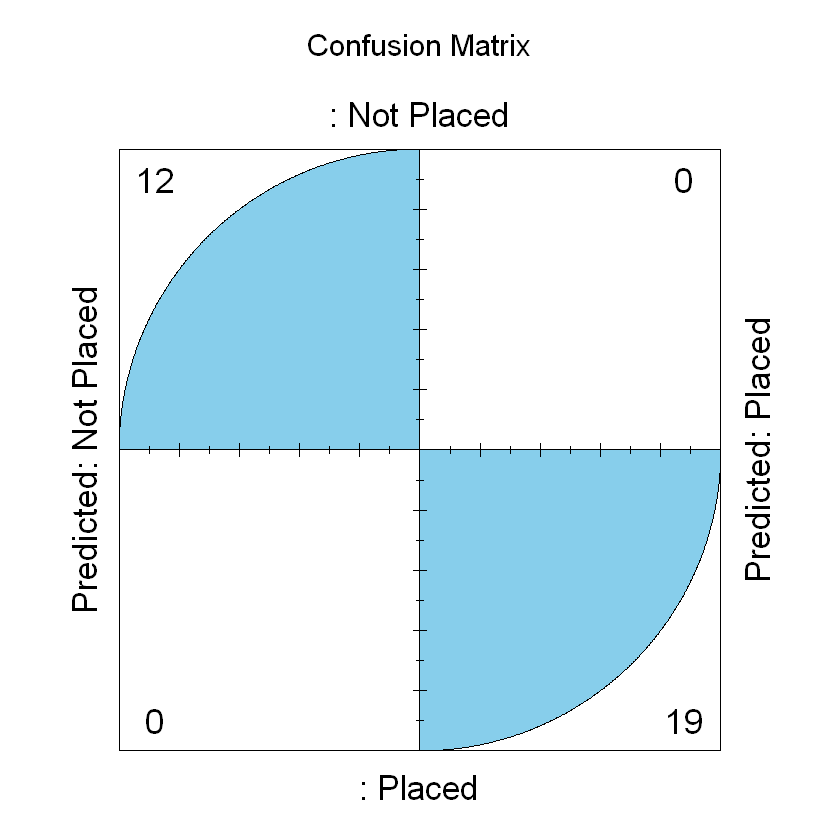

In [160]:
Predicted<-y_pred_ne
cm <- table(test_ne$status, Predicted)
cm
fourfoldplot(cm, color = c("pink", "skyblue"),conf.level = 0, margin = 2, main = "Confusion Matrix")

<h3>Accuracy Score</h3><br>
<li>In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
<li><b>It ranges from 0 to 1, where 0 is Worst and 1 is Best</b>
 <li>Its is often multipled with 100 to get accuracy percentage.

<h3>Precision, Recall, and F-1 Score</h3><br>
<ul>
<li>Precision is the fraction of the correctly classified instances from the total classified instances. 
 <li>Recall is the fraction of the correctly classified instances from the total classified instances.
 <li>Its is often multipled with 100 to get percentage.
   
<li>Precision and recall are given as follows
</ul>
<img src="precision.png"><img src="recall.png"><br>
<li>The F1 score can be interpreted as a weighted average of the precision and recall.
<li><b> F1 score reaches its best value at 1 and worst score at 0.</b> 
    <li>Its is often multipled with 100 to get percentage.<br>
<img src="fscore.png">

In [161]:
cat('Accuracy:',accuracy(test_ne$status, y_pred_ne))#<-sum(diag(cm))/nrow(test_cl)*100
cat('\nRecall:',recall(test_ne$status, y_pred_ne))
cat('\nPrecision:',precision(test_ne$status, y_pred_ne))
cat('\nF1_Score:',f1_score(test_ne$status, y_pred_ne))

Accuracy: 100
Recall: 100
Precision: 100
F1_Score: 100

### Validation metrics

In [162]:
confusionMatrix(cm, positive = "Placed")

Confusion Matrix and Statistics

            Predicted
             Not Placed Placed
  Not Placed         12      0
  Placed              0     19
                                     
               Accuracy : 1          
                 95% CI : (0.8878, 1)
    No Information Rate : 0.6129     
    P-Value [Acc > NIR] : 2.565e-07  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         
                                     
            Sensitivity : 1.0000     
            Specificity : 1.0000     
         Pos Pred Value : 1.0000     
         Neg Pred Value : 1.0000     
             Prevalence : 0.6129     
         Detection Rate : 0.6129     
   Detection Prevalence : 0.6129     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : Placed     
                                     

<h3>Log loss</h3><br>
<li>Logarithmic loss (or log loss) measures the performance of a classification model where the prediction is a probability value between 0 and 1.
<li>Log loss increases as the predicted probability diverge from the actual label.
    <br><br><center><b>Lower the log-loss value, better are the predictions of the model.</b></center>
<img src="logloss.png">

In [163]:
cat('LogLoss :',LogLoss(predict(classifier_ne, newdata = test_ne,type = "prob",interval = 'confidence')[,2],lbl$fit_transform(test_ne$status)))

LogLoss : 0.1493578

<h3>ROC AUC score</h3><br>
<li>Tt is used to find Area Under Curve(AUC) in ROC graph.
<li><b>It ranges from 0 to 1, where 0 is Worst and 1 is Best</b>

In [164]:
cat('Roc_Auc_Score :',auc(as.numeric(test_ne$status), as.numeric(y_pred_ne)))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



Roc_Auc_Score : 1

### Plotting ROC curve for Specificity  VS Sensitivity


<li>ROC=Compute Receiver Operating Characteristic.

Setting levels: control = 1, case = 2

Setting direction: controls < cases



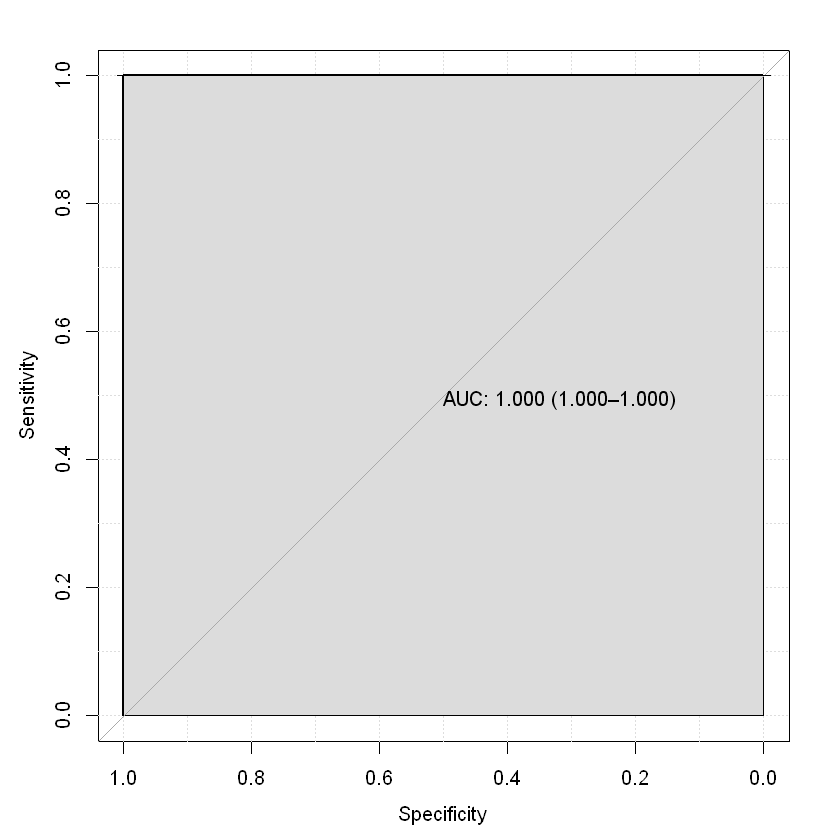

In [165]:
pROC_obj <- roc(as.numeric(test_ne$status), as.numeric(y_pred_ne),
            smoothed = TRUE,
            # arguments for ci
            ci=TRUE, ci.alpha=0.9, stratified=TRUE,
            # arguments for plot
            plot=TRUE, auc.polygon=TRUE, max.auc.polygon=TRUE, grid=TRUE,
            print.auc=TRUE, show.thres=TRUE)
sens.ci <- ci.se(pROC_obj)
plot(sens.ci, type="shape", col="lightblue")
plot(sens.ci, type="bars")


## Model Deployment

In [166]:
saveRDS(classifier_ne, file = "StudentPlacementPredModel.RData")
write.csv(df,"preprocessed.csv", row.names = TRUE)

<h1>Results</h1><br>
<table style="font-size:14px;text-align:center;height:2px;">
<tr >
    <th style='border: 1px solid black'>Validation metric</th>
    <th style='border: 1px solid black'>Train_size</th>  
    <th style='border: 1px solid black'>Test_size</th>
    <th style='border: 1px solid black'>Confusion matrix</th>
    <th style='border: 1px solid black'>F1score</th> 
    <th style='border: 1px solid black'>Log_loss</th>
    <th style='border: 1px solid black'>Roc_Auc_score</th> 
    <th style='border: 1px solid black'>Accuracy</th> 
</tr>
<tr>
   <td style='border: 1px solid black'>LogLoss</td>
   <td style='border: 1px solid black'>0.8</td>
    <td style='border: 1px solid black'>0.2</td>
    <td style='border: 1px solid black'><table style="font-size:15px;border:1px solid black">
        <tr>
            <td style='border: 1px solid black'>13</td>
            <td style='border: 1px solid black'>1</td> 
        </tr>
        <tr>
            <td style='border: 1px solid black'>0</td>
            <td style='border: 1px solid black'>13</td> 
        </tr>
        </table></td>
    <td style='border: 1px solid black'>0.98360</td>
    <td style='border: 1px solid black'>0.12246</td>
    <td style='border: 1px solid black'>0.96428</td>
    <td style='border: 1px solid black'><b>97.72%</b></td>
</tr>
</table>
</center>

## End of the Notebook

## Notebook Details

Notebook by : Gangadhar C<br>
Reg no.     : 39110202<br>
Dataset     : Placement.csv<br>
Algorithm   : Naive Bayes<br>
Problem Type: Classification<br>